In [382]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns

In [383]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [3]:
df = pd.read_csv('finalz.csv')

In [4]:
df

,Unnamed: 0,name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings,url
0,0,رواح للوحدات السكنية,Taif,SAR 190.00,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180 reviews,https://www.booking.com/hotel/sa/twrnt-ll-jnh-...
1,1,Aloft Riyadh Hotel,Riyadh,SAR 475.00,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,"2,947 reviews",https://www.booking.com/hotel/sa/aloft-riyadh....
2,2,Nourth House ApartHotel,Al Qurayyat,SAR 200.00,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264 reviews,https://www.booking.com/hotel/sa/nwrth-hws-lqr...
3,3,Dyar Al Hamra Hotel,Jeddah,SAR 340.00,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,"3,923 reviews",https://www.booking.com/hotel/sa/dyar-inn.en-g...
4,4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,SAR 525.00,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,"1,032 reviews",https://www.booking.com/hotel/sa/courtyard-riy...
...,...,...,...,...,...,...,...,...,...,...,...
1070,49,العييري للوحدات المفروشة الباحة3,Buraydah,SAR 110.00,"1 night, 2 adults",Double Room with Private Bathroom,2 single beds,3.7,Review score,72 reviews,/hotel/sa/l-yyry-llwhdt-lskny-lmfrwsh-lbh-3-lb...
1071,50,Anwar Al Zahraa Hotel,Madinah,SAR 100.00,"1 night, 2 adults",Double Room,2 single beds,7.3,Good,260 reviews,/hotel/sa/anwar-al-zahraa.en-gb.html?aid=30414...
1072,51,OYO 242 Al Ahlam Resort Al Leith,Al Lith,SAR 387.00,"1 night, 2 adults",Standard Studio Double,1 double bed,6.5,Review score,333 reviews,/hotel/sa/al-ahlam-resort-alleith.en-gb.html?a...
1073,52,فندق سوار,Madinah,SAR 145.00,"1 night, 2 adults",Small Twin Room,2 single beds,8.6,Fabulous,22 reviews,/hotel/sa/sewar.en-gb.html?aid=304142&label=ge...


In [7]:
#Lets start by cleaning up the data following the below steps:
#     1. Checking and removing Duplicate rows
#     2. Stripping the columns/observations from white spaces
#     3. Removing texts from continious observations
#     4. Dropping unnecessarily columns 
    

In [8]:
df.drop({'Unnamed: 0','url'}, axis = 'columns' , inplace = True)

In [9]:
df

,name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
0,رواح للوحدات السكنية,Taif,SAR 190.00,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180 reviews
1,Aloft Riyadh Hotel,Riyadh,SAR 475.00,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,"2,947 reviews"
2,Nourth House ApartHotel,Al Qurayyat,SAR 200.00,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264 reviews
3,Dyar Al Hamra Hotel,Jeddah,SAR 340.00,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,"3,923 reviews"
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,SAR 525.00,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,"1,032 reviews"
...,...,...,...,...,...,...,...,...,...
1070,العييري للوحدات المفروشة الباحة3,Buraydah,SAR 110.00,"1 night, 2 adults",Double Room with Private Bathroom,2 single beds,3.7,Review score,72 reviews
1071,Anwar Al Zahraa Hotel,Madinah,SAR 100.00,"1 night, 2 adults",Double Room,2 single beds,7.3,Good,260 reviews
1072,OYO 242 Al Ahlam Resort Al Leith,Al Lith,SAR 387.00,"1 night, 2 adults",Standard Studio Double,1 double bed,6.5,Review score,333 reviews
1073,فندق سوار,Madinah,SAR 145.00,"1 night, 2 adults",Small Twin Room,2 single beds,8.6,Fabulous,22 reviews


In [237]:
#df.dropna(how='all')

df.isnull().sum()


name                  0
location              0
price                 0
price_for             0
room_type             0
beds                  4
rating               38
rating_title         38
number_of_ratings    38
dtype: int64

In [238]:
df.rename(columns = {'name' : 'hotel_name'}, inplace = True)

In [239]:
df

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
0,رواح للوحدات السكنية,Taif,SAR 190.00,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180 reviews
1,Aloft Riyadh Hotel,Riyadh,SAR 475.00,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,"2,947 reviews"
2,Nourth House ApartHotel,Al Qurayyat,SAR 200.00,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264 reviews
3,Dyar Al Hamra Hotel,Jeddah,SAR 340.00,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,"3,923 reviews"
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,SAR 525.00,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,"1,032 reviews"
...,...,...,...,...,...,...,...,...,...
1070,العييري للوحدات المفروشة الباحة3,Buraydah,SAR 110.00,"1 night, 2 adults",Double Room with Private Bathroom,2 single beds,3.7,Review score,72 reviews
1071,Anwar Al Zahraa Hotel,Madinah,SAR 100.00,"1 night, 2 adults",Double Room,2 single beds,7.3,Good,260 reviews
1072,OYO 242 Al Ahlam Resort Al Leith,Al Lith,SAR 387.00,"1 night, 2 adults",Standard Studio Double,1 double bed,6.5,Review score,333 reviews
1073,فندق سوار,Madinah,SAR 145.00,"1 night, 2 adults",Small Twin Room,2 single beds,8.6,Fabulous,22 reviews


In [240]:
df.columns.str.strip()

Index(['hotel_name', 'location', 'price', 'price_for', 'room_type', 'beds',
       'rating', 'rating_title', 'number_of_ratings'],
      dtype='object')

In [241]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1070    False
1071     True
1072     True
1073     True
1074     True
Length: 1075, dtype: bool

In [242]:
df.loc[df.duplicated(), :]

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
153,Danat Park Hotel,Yanbu,SAR 140.00,"1 night, 2 adults",Budget Double Room,1 large double bed,6.5,Review score,563 reviews
154,فندق بانوراما الخبر-Panorama ALkohbar Hotel,Riyadh,SAR 400.00,"1 night, 2 adults",Duplex Studio,1 double bed,6.6,Review score,89 reviews
155,Rose Diamond Hotel,Madinah,SAR 100.00,"1 night, 2 adults",Standard Quadruple Room,3 single beds,6.7,Review score,318 reviews
156,Makarim Palm Hotel,Rabigh,SAR 160.00,"1 night, 2 adults",One-Bedroom Apartment,1 extra-large double bed,6.8,Review score,311 reviews
157,مينا بلازا الطائف Mena Plaza Taif,Taif,SAR 140.00,"1 night, 2 adults",Standard King Room,1 extra-large double bed,5.8,Review score,"1,112 reviews"
...,...,...,...,...,...,...,...,...,...
1069,Faifa Hotel,Fayfa,SAR 375.00,"1 night, 2 adults",Double Room,1 large double bed,7.0,Good,302 reviews
1071,Anwar Al Zahraa Hotel,Madinah,SAR 100.00,"1 night, 2 adults",Double Room,2 single beds,7.3,Good,260 reviews
1072,OYO 242 Al Ahlam Resort Al Leith,Al Lith,SAR 387.00,"1 night, 2 adults",Standard Studio Double,1 double bed,6.5,Review score,333 reviews
1073,فندق سوار,Madinah,SAR 145.00,"1 night, 2 adults",Small Twin Room,2 single beds,8.6,Fabulous,22 reviews


In [243]:
df.drop_duplicates(keep='first' ,inplace=True)

In [244]:
df

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
0,رواح للوحدات السكنية,Taif,SAR 190.00,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180 reviews
1,Aloft Riyadh Hotel,Riyadh,SAR 475.00,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,"2,947 reviews"
2,Nourth House ApartHotel,Al Qurayyat,SAR 200.00,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264 reviews
3,Dyar Al Hamra Hotel,Jeddah,SAR 340.00,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,"3,923 reviews"
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,SAR 525.00,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,"1,032 reviews"
...,...,...,...,...,...,...,...,...,...
1044,Golden Sea Hotel,Obhor,SAR 340.00,"1 night, 2 adults",Junior Suite,1 large double bed,8.2,Very good,172 reviews
1045,Desert Rose Motel,Al Ghat,SAR 150.00,"1 night, 2 adults",Family Room with Private Bathroom,1 large double bed,NaN,NaN,NaN
1046,Golden Dune Hotel,Turayf,SAR 250.00,"1 night, 2 adults",Small Double Room,1 double bed,9.0,Superb,"1,735 reviews"
1047,قصر البالود 2,Riyadh,SAR 127.00,"1 night, 2 adults",Budget Double Room,1 double bed,8.9,Fabulous,228 reviews


In [245]:
df.duplicated().sum()

0

In [246]:
df.sort_values('price', ascending = False)

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
496,Swiss International Resort Unaizah Al Qassim,Unayzah,SAR 998.00,"1 night, 2 adults",One Bedroom Villa with Indoor Pool,1 large double bed,8.5,Very good,871 reviews
163,Al Eairy Apartment-Alqaseem 1,Buraydah,SAR 99.00,"1 night, 2 adults",Twin Room,2 single beds,4.8,Review score,352 reviews
963,Al Kiswah Towers Hotel,Makkah Show on map,SAR 99.00,"1 night, 1 adult",Standard Double or Twin Room,2 single beds,8.2,Very good,"5,241 reviews"
679,أجنحة سالين - للوحدات السكنية المفروشة,As Suwayfilah,SAR 99.00,"1 night, 1 adult",Double Room with Private Bathroom,1 large double bed,5.9,Review score,53 reviews
86,Rihan Tibah Furnished Units,Madinah,SAR 99.00,"1 night, 2 adults",Triple Room with Private Bathroom,3 single beds,5.4,Review score,36 reviews
...,...,...,...,...,...,...,...,...,...
853,Fraser Suites Riyadh,Riyadh,"SAR 1,035.00","1 night, 1 adult",Executive One Bedroom Suite,1 extra-large double bed,7.9,Good,"4,110 reviews"
206,شالية مارينا,Al Muwayh,"SAR 1,000.00","1 night, 2 adults",Two-Bedroom Chalet,"3 beds\r\n(1 single, 1 double, 1 sofa bed)",NaN,NaN,NaN
213,شاليهات فلورنيسا الطائف,Taif,"SAR 1,000.00","1 night, 2 adults",Deluxe King Room,1 single bed,8.5,Very good,6 reviews
715,"Burj Rafal Riyadh, a Marriott International Hotel",Riyadh,"SAR 1,000.00","1 night, 1 adult","Deluxe, Guest room, 1 King, City view",1 extra-large double bed,7.9,Good,"4,620 reviews"


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 1070
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         899 non-null    object 
 1   location           899 non-null    object 
 2   price              899 non-null    object 
 3   price_for          899 non-null    object 
 4   room_type          899 non-null    object 
 5   beds               895 non-null    object 
 6   rating             867 non-null    float64
 7   rating_title       867 non-null    object 
 8   number_of_ratings  867 non-null    object 
dtypes: float64(1), object(8)
memory usage: 70.2+ KB


In [248]:
#df["price"] == "SAR 1,000"

df

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
0,رواح للوحدات السكنية,Taif,SAR 190.00,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180 reviews
1,Aloft Riyadh Hotel,Riyadh,SAR 475.00,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,"2,947 reviews"
2,Nourth House ApartHotel,Al Qurayyat,SAR 200.00,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264 reviews
3,Dyar Al Hamra Hotel,Jeddah,SAR 340.00,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,"3,923 reviews"
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,SAR 525.00,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,"1,032 reviews"
...,...,...,...,...,...,...,...,...,...
1044,Golden Sea Hotel,Obhor,SAR 340.00,"1 night, 2 adults",Junior Suite,1 large double bed,8.2,Very good,172 reviews
1045,Desert Rose Motel,Al Ghat,SAR 150.00,"1 night, 2 adults",Family Room with Private Bathroom,1 large double bed,NaN,NaN,NaN
1046,Golden Dune Hotel,Turayf,SAR 250.00,"1 night, 2 adults",Small Double Room,1 double bed,9.0,Superb,"1,735 reviews"
1047,قصر البالود 2,Riyadh,SAR 127.00,"1 night, 2 adults",Budget Double Room,1 double bed,8.9,Fabulous,228 reviews


In [186]:
df

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
0,رواح للوحدات السكنية,Taif,SAR 190.00,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180 reviews
1,Aloft Riyadh Hotel,Riyadh,SAR 475.00,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,"2,947 reviews"
2,Nourth House ApartHotel,Al Qurayyat,SAR 200.00,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264 reviews
3,Dyar Al Hamra Hotel,Jeddah,SAR 340.00,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,"3,923 reviews"
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,SAR 525.00,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,"1,032 reviews"
...,...,...,...,...,...,...,...,...,...
1070,العييري للوحدات المفروشة الباحة3,Buraydah,SAR 110.00,"1 night, 2 adults",Double Room with Private Bathroom,2 single beds,3.7,Review score,72 reviews
1071,Anwar Al Zahraa Hotel,Madinah,SAR 100.00,"1 night, 2 adults",Double Room,2 single beds,7.3,Good,260 reviews
1072,OYO 242 Al Ahlam Resort Al Leith,Al Lith,SAR 387.00,"1 night, 2 adults",Standard Studio Double,1 double bed,6.5,Review score,333 reviews
1073,فندق سوار,Madinah,SAR 145.00,"1 night, 2 adults",Small Twin Room,2 single beds,8.6,Fabulous,22 reviews


In [249]:
df2= (df['price'].str.extract(r'(?P<price>\d+(?:\,\d+)?)').applymap(str.strip))

In [250]:
df2.sort_values('price', ascending = False)

,price
496,998
163,99
963,99
679,99
86,99
...,...
853,"1,035"
206,"1,000"
213,"1,000"
715,"1,000"


In [225]:
df

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
0,رواح للوحدات السكنية,Taif,190,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180 reviews
1,Aloft Riyadh Hotel,Riyadh,475,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,"2,947 reviews"
2,Nourth House ApartHotel,Al Qurayyat,200,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264 reviews
3,Dyar Al Hamra Hotel,Jeddah,340,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,"3,923 reviews"
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,"1,032 reviews"
...,...,...,...,...,...,...,...,...,...
1070,العييري للوحدات المفروشة الباحة3,Buraydah,110,"1 night, 2 adults",Double Room with Private Bathroom,2 single beds,3.7,Review score,72 reviews
1071,Anwar Al Zahraa Hotel,Madinah,100,"1 night, 2 adults",Double Room,2 single beds,7.3,Good,260 reviews
1072,OYO 242 Al Ahlam Resort Al Leith,Al Lith,387,"1 night, 2 adults",Standard Studio Double,1 double bed,6.5,Review score,333 reviews
1073,فندق سوار,Madinah,145,"1 night, 2 adults",Small Twin Room,2 single beds,8.6,Fabulous,22 reviews


In [251]:
df['price'] = df2['price']

In [252]:
df['price'] = df['price'].str.replace(',', '')

In [253]:
df.sort_values('price', ascending = False) 

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
496,Swiss International Resort Unaizah Al Qassim,Unayzah,998,"1 night, 2 adults",One Bedroom Villa with Indoor Pool,1 large double bed,8.5,Very good,871 reviews
163,Al Eairy Apartment-Alqaseem 1,Buraydah,99,"1 night, 2 adults",Twin Room,2 single beds,4.8,Review score,352 reviews
963,Al Kiswah Towers Hotel,Makkah Show on map,99,"1 night, 1 adult",Standard Double or Twin Room,2 single beds,8.2,Very good,"5,241 reviews"
679,أجنحة سالين - للوحدات السكنية المفروشة,As Suwayfilah,99,"1 night, 1 adult",Double Room with Private Bathroom,1 large double bed,5.9,Review score,53 reviews
86,Rihan Tibah Furnished Units,Madinah,99,"1 night, 2 adults",Triple Room with Private Bathroom,3 single beds,5.4,Review score,36 reviews
...,...,...,...,...,...,...,...,...,...
52,Golden Dakhil,Madinah,100,"1 night, 2 adults",Economy Double Room,1 extra-large double bed,7.3,Good,420 reviews
504,Manarat Al Misk Hotel,Makkah,100,"1 night, 2 adults",Basic Triple Room,3 single beds,6.9,Review score,517 reviews
131,Genac Hotel Yanbu,Yanbu,100,"1 night, 2 adults",Deluxe Double Room,2 single beds,7.1,Good,444 reviews
535,Manarat Al Misk Hotel,Makkah,100,"1 night, 2 adults",Basic Triple Room,3 single beds,6.9,Review score,517 reviews


In [155]:
df.location.value_counts()

Jeddah               134
Riyadh               118
Madinah               70
Riyadh                48
Makkah                46
                    ... 
Ad Darb                1
Wadi Al Dawasir        1
Burayman               1
Al Namas               1
Al Ghat                1
Name: location, Length: 196, dtype: int64

In [254]:
df['price'] == 1000

0       False
1       False
2       False
3       False
4       False
        ...  
1044    False
1045    False
1046    False
1047    False
1070    False
Name: price, Length: 899, dtype: bool

In [255]:
df['price'] = df['price'].astype(int)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 1070
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         899 non-null    object 
 1   location           899 non-null    object 
 2   price              899 non-null    int64  
 3   price_for          899 non-null    object 
 4   room_type          899 non-null    object 
 5   beds               895 non-null    object 
 6   rating             867 non-null    float64
 7   rating_title       867 non-null    object 
 8   number_of_ratings  867 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 70.2+ KB


In [259]:
df.loc[df['price'] >= 1000].count()

hotel_name           38
location             38
price                38
price_for            38
room_type            38
beds                 38
rating               35
rating_title         35
number_of_ratings    35
dtype: int64

In [583]:
df[df.price >= 1000]

,hotel_name,location,price,room_type,beds,rating,rating_title,number_of_ratings,per_night
88,مزرعة بإطلالة على الجبل,Madain,1603,Family Room,8,8.5,Very good,15,1
103,منتجع قرية الفقرة,Madinah,1400,Two-Bedroom Villa,4,8.6,Fabulous,8,1
110,Luxury apartment in KAEC شقة فاخرة ابراج الشاط...,King Abdullah Economic City,1259,Apartment,5,9.4,Superb,7,1
133,شاليهات سحاب,Buraydah,1150,Two-Bedroom Chalet,3,9.1,Superb,14,1
158,Luxury apartment in KAEC شقة فاخرة ابراج الشاط...,King Abdullah Economic,1259,Apartment,5,9.4,Superb,7,1
199,شالية مارينا,Al Muwayh,1000,Two-Bedroom Chalet,3,0.0,NaN,0,1
206,شاليهات فلورنيسا الطائف,Taif,1000,Deluxe King Room,1,8.5,Very good,6,1
260,منتجع ومزرعة الرند العلا,Al Ula,1250,Two-Bedroom Chalet without pool,5,7.2,Good,8,1
450,شاليه فيلا درة العروس,Jeddah,2000,Two-Bedroom Chalet,9,8.5,Very good,77,1
594,"Burj Rafal Riyadh, a Marriott International Hotel",Riyadh,1000,"Deluxe, Guest room, 1 King, City view",1,7.9,Good,4620,1


In [264]:
df['number_of_ratings'] = (df['number_of_ratings'].str.extract(r'(?P<number_of_ratings>\d+(?:\,\d+)?)').astype(str)
                 .applymap(str.strip))

In [265]:
df['number_of_ratings']

0         180
1       2,947
2         264
3       3,923
4       1,032
        ...  
1044      172
1045      nan
1046    1,735
1047      228
1070       72
Name: number_of_ratings, Length: 899, dtype: object

In [266]:
df['number_of_ratings'] = df['number_of_ratings'].str.replace(',', '')

In [295]:
df['number_of_ratings']


0        180
1       2947
2        264
3       3923
4       1032
        ... 
1044     172
1045       0
1046    1735
1047     228
1070      72
Name: number_of_ratings, Length: 899, dtype: object

In [279]:
df['number_of_ratings'] = df['number_of_ratings'].fillna(0)
#



In [280]:
df['number_of_ratings']

0        180
1       2947
2        264
3       3923
4       1032
        ... 
1044     172
1045     nan
1046    1735
1047     228
1070      72
Name: number_of_ratings, Length: 899, dtype: object

0        180
1       2947
2        264
3       3923
4       1032
        ... 
1044     172
1045     nan
1046    1735
1047     228
1070      72
Name: number_of_ratings, Length: 899, dtype: object

In [282]:
df['number_of_ratings']

0        180
1       2947
2        264
3       3923
4       1032
        ... 
1044     172
1045     nan
1046    1735
1047     228
1070      72
Name: number_of_ratings, Length: 899, dtype: object

In [283]:
df['number_of_ratings'] = df['number_of_ratings'].replace(np.nan, 0)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 1070
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         899 non-null    object 
 1   location           899 non-null    object 
 2   price              899 non-null    int64  
 3   price_for          899 non-null    object 
 4   room_type          899 non-null    object 
 5   beds               895 non-null    object 
 6   rating             867 non-null    float64
 7   rating_title       867 non-null    object 
 8   number_of_ratings  899 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 110.2+ KB


In [293]:


df['number_of_ratings'] = df['number_of_ratings'].replace('nan', 0)

In [294]:
df['number_of_ratings']

0        180
1       2947
2        264
3       3923
4       1032
        ... 
1044     172
1045       0
1046    1735
1047     228
1070      72
Name: number_of_ratings, Length: 899, dtype: object

In [303]:
df.info()
df['number_of_ratings'].fillna(0)
df['number_of_ratings'].astype(int)
#df['number_of_ratings'] = pd.to_numeric(df['number_of_ratings']) convert






<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 1070
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         899 non-null    object 
 1   location           899 non-null    object 
 2   price              899 non-null    int64  
 3   price_for          899 non-null    object 
 4   room_type          899 non-null    object 
 5   beds               895 non-null    object 
 6   rating             867 non-null    float64
 7   rating_title       867 non-null    object 
 8   number_of_ratings  899 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 110.2+ KB


0        180
1       2947
2        264
3       3923
4       1032
        ... 
1044     172
1045       0
1046    1735
1047     228
1070      72
Name: number_of_ratings, Length: 899, dtype: int64

In [322]:
df['rating'] = df['rating'].replace(np.nan, 0)

In [323]:
df['rating']

0       7.5
1       8.2
2       7.5
3       7.7
4       8.1
       ... 
1044    8.2
1045    0.0
1046    9.0
1047    8.9
1070    3.7
Name: rating, Length: 899, dtype: float64

In [326]:
df['per_night']= df['price_for']

In [327]:
df

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings,per_night
0,رواح للوحدات السكنية,Taif,190,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180,"1 night, 1 adult"
1,Aloft Riyadh Hotel,Riyadh,475,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,2947,"1 night, 1 adult"
2,Nourth House ApartHotel,Al Qurayyat,200,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264,"1 night, 1 adult"
3,Dyar Al Hamra Hotel,Jeddah,340,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,3923,"1 night, 1 adult"
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,1032,"1 night, 1 adult"
...,...,...,...,...,...,...,...,...,...,...
1044,Golden Sea Hotel,Obhor,340,"1 night, 2 adults",Junior Suite,1 large double bed,8.2,Very good,172,"1 night, 2 adults"
1045,Desert Rose Motel,Al Ghat,150,"1 night, 2 adults",Family Room with Private Bathroom,1 large double bed,0.0,NaN,0,"1 night, 2 adults"
1046,Golden Dune Hotel,Turayf,250,"1 night, 2 adults",Small Double Room,1 double bed,9.0,Superb,1735,"1 night, 2 adults"
1047,قصر البالود 2,Riyadh,127,"1 night, 2 adults",Budget Double Room,1 double bed,8.9,Fabulous,228,"1 night, 2 adults"


In [330]:
df['per_night'] = (df['per_night'].str.extract(r'(?P<per_night>\d+(?:\,\d+)?)').astype(str)
                 .applymap(str.strip))

In [335]:
df

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings,per_night
0,رواح للوحدات السكنية,Taif,190,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180,1
1,Aloft Riyadh Hotel,Riyadh,475,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,2947,1
2,Nourth House ApartHotel,Al Qurayyat,200,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264,1
3,Dyar Al Hamra Hotel,Jeddah,340,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,3923,1
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,1032,1
...,...,...,...,...,...,...,...,...,...,...
1044,Golden Sea Hotel,Obhor,340,"1 night, 2 adults",Junior Suite,1 large double bed,8.2,Very good,172,1
1045,Desert Rose Motel,Al Ghat,150,"1 night, 2 adults",Family Room with Private Bathroom,1 large double bed,0.0,NaN,0,1
1046,Golden Dune Hotel,Turayf,250,"1 night, 2 adults",Small Double Room,1 double bed,9.0,Superb,1735,1
1047,قصر البالود 2,Riyadh,127,"1 night, 2 adults",Budget Double Room,1 double bed,8.9,Fabulous,228,1


In [332]:
df['per_night'].astype(int)

0       1
1       1
2       1
3       1
4       1
       ..
1044    1
1045    1
1046    1
1047    1
1070    1
Name: per_night, Length: 899, dtype: int64

In [359]:
df.drop(['price_for'], axis = 1 , inplace=True)




In [345]:
df['per_night'] = pd.to_numeric(df['per_night']) 

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 1070
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         899 non-null    object 
 1   location           899 non-null    object 
 2   price              899 non-null    int64  
 3   price_for          899 non-null    object 
 4   room_type          899 non-null    object 
 5   beds               895 non-null    object 
 6   rating             899 non-null    float64
 7   rating_title       867 non-null    object 
 8   number_of_ratings  899 non-null    int64  
 9   per_night          899 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 117.3+ KB


In [1218]:
df['rating_title'].value_counts()

Good           308
Very           222
Review         205
Fabulous        87
Superb          38
nan             32
Exceptional      7
Name: rating_title, dtype: int64

In [410]:
df.room_type.value_counts()

One-Bedroom Apartment                                105
Studio                                                44
Double Room                                           35
Two-Bedroom Apartment                                 32
Standard Double Room                                  24
                                                    ... 
Deluxe Junior Suite                                    1
Studio Apartment, 2 Double, Sofa bed, Garden view      1
Apartment with Mountain View                           1
Deluxe King Room with City View City Tower             1
Queen Room with Two Queen Beds                         1
Name: room_type, Length: 219, dtype: int64

In [411]:
df3 = df


In [543]:
#df3= (df['beds'].str.extract(r'(?P<beds>\d+(?:\.\d+)?)').applymap(str.strip))


df3.tail()

,hotel_name,location,price,room_type,beds,rating,rating_title,number_of_ratings,per_night
894,Golden Sea Hotel,Obhor,340,Junior Suite,1,8.2,Very good,172,1
895,Desert Rose Motel,Al Ghat,150,Family Room with Private Bathroom,1,0.0,NaN,0,1
896,Golden Dune Hotel,Turayf,250,Small Double Room,1,9.0,Superb,1735,1
897,قصر البالود 2,Riyadh,127,Budget Double Room,1,8.9,Fabulous,228,1
898,العييري للوحدات المفروشة الباحة3,Buraydah,110,Double Room with Private Bathroom,2,3.7,Review score,72,1


In [387]:
df3['beds']=df3.beds.str.extract('(\d+)')

In [421]:
df3['beds'].isnull().sum()

0

In [419]:
#df[df3['beds'].isnull()]


#df3.beds.fillna(0)

df3['beds'] = df3['beds'].replace(np.nan, 0)

In [456]:
df3[df3['beds'] == 0]

df3.reset_index( inplace=True)
df3.drop(['level_0'], axis = 1 , inplace=True)


In [459]:
df3.drop(['index'],axis = 1, inplace=True)

In [538]:
df3[df3['beds']== 0]

,hotel_name,location,price,room_type,beds,rating,rating_title,number_of_ratings,per_night


In [614]:
df3.iloc[2:,5]

2      7.5
3      7.7
4      8.1
5      7.3
6      8.4
      ... 
894    8.2
895    0.0
896    9.0
897    8.9
898    3.7
Name: rating, Length: 897, dtype: float64

In [537]:
df3.iloc[677,:]

hotel_name                      Howard Johnson Dammam Hotel
location                                             Dammam
price                                                   349
room_type            King Room with City View - Non-Smoking
beds                                                      1
rating                                                  7.7
rating_title                                           Good
number_of_ratings                                      1868
per_night                                                 1
Name: 677, dtype: object

In [36]:
df3[df3['location']== "Riyadh Show on map"]

,hotel_name,location,price,room_type,beds,rating,rating_title,number_of_ratings


In [581]:
df3.iloc[831,1] = "Riyadh"

,hotel_name,location,price,room_type,beds,rating,rating_title,number_of_ratings,per_night
0,رواح للوحدات السكنية,Taif,190,One-Bedroom Apartment,2,7.5,Good,180,1
1,Aloft Riyadh Hotel,Riyadh,475,"Breezy Room, Guest room, 1 King",1,8.2,Very good,2947,1
2,Nourth House ApartHotel,Al Qurayyat,200,Budget Twin Room,2,7.5,Good,264,1
3,Dyar Al Hamra Hotel,Jeddah,340,Junior Suite King,1,7.7,Good,3923,1
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"Standard, Guest room, 1 King",1,8.1,Very good,1032,1
...,...,...,...,...,...,...,...,...,...
894,Golden Sea Hotel,Obhor,340,Junior Suite,1,8.2,Very good,172,1
895,Desert Rose Motel,Al Ghat,150,Family Room with Private Bathroom,1,0.0,NaN,0,1
896,Golden Dune Hotel,Turayf,250,Small Double Room,1,9.0,Superb,1735,1
897,قصر البالود 2,Riyadh,127,Budget Double Room,1,8.9,Fabulous,228,1


In [589]:
df3[df3['location'].str.contains("Show on map")]

,hotel_name,location,price,room_type,beds,rating,rating_title,number_of_ratings,per_night
188,فندق المحمل العصري,Sharurah Show on map,150,Double Room,1,0.0,NaN,0,1
760,Tanuma Aram Hospitality - Hotel Apartments,Tanomah Show on map,306,Apartment with Mountain View,1,8.2,Very good,1005,1
769,Desert Rose Motel,Al Ghāţ Show on map,150,Family Room with Private Bathroom,1,0.0,NaN,0,1
770,Golden Dune Hotel,Ţurayf Show on map,180,Superior King Room,1,9.0,Superb,1733,1
771,قصر البالود 2,Az Zahrāʼ Show on map,220,Three-Bedroom Suite,5,8.9,Fabulous,228,1
...,...,...,...,...,...,...,...,...,...
871,Marriott Executive Apartments Madinah,Al Madinah Show on map,850,"Studio Apartment, 1 King, Sofa bed, Garden view",2,9.0,Superb,895,1
875,دار الود للأجنحة الفندقية,Jeddah Show on map,217,Studio,1,8.2,Very good,336,1
877,Rolana Furnished Apartments,Jeddah Show on map,189,Deluxe Studio,1,7.5,Good,40,1
880,فندق حياة تاون,Umm Lajj Show on map,629,Deluxe Suite,2,7.3,Good,8,1


In [330]:
#df3.iloc[831,1] = "Riyadh"




#df3.to_csv("reg1.csv",index=False)


df3 = pd.read_csv('reg1112.csv')
df3.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         899 non-null    object 
 1   location           899 non-null    object 
 2   price              899 non-null    int64  
 3   room_type          899 non-null    object 
 4   beds               899 non-null    int64  
 5   rating             899 non-null    float64
 6   rating_title       867 non-null    object 
 7   number_of_ratings  899 non-null    int64  
 8   per_night          899 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 63.3+ KB


In [326]:
df4 = pd.read_csv('reg22.csv') 

In [7]:
df4.drop([ 'per_night','Log_number_of_ratings','Log_price'],axis = 1, inplace=True)

In [327]:
df4  

,hotel_name,location,price,room_type,beds,rating,rating_title,number_of_ratings,per_night,Log_number_of_ratings,Log_price,Size
0,رواح للوحدات السكنية,Taif,190,One-Bedroom Apartment,2,7.5,Good,180,1,5.192957,5.247024,54
1,Aloft Riyadh Hotel,Riyadh,475,"Breezy Room, Guest room, 1 King",1,8.2,Good,2947,1,7.988543,6.163315,32
2,Nourth House ApartHotel,Al Qurayyat,200,Budget Twin Room,2,7.5,Good,264,1,5.575949,5.298317,35
3,Dyar Al Hamra Hotel,Jeddah,340,Junior Suite King,1,7.7,Good,3923,1,8.274612,5.828946,28
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"Standard, Guest room, 1 King",1,8.1,Good,1032,1,6.939254,6.263398,30
...,...,...,...,...,...,...,...,...,...,...,...,...
894,Golden Sea Hotel,Obhor,340,Junior Suite,1,8.2,Good,172,1,5.147494,5.828946,30
895,Desert Rose Motel,Al Ghat,150,Family Room with Private Bathroom,1,0.0,Very good,0,1,-inf,5.010635,37
896,Golden Dune Hotel,Turayf,250,Small Double Room,1,9.0,Superb,1735,1,7.458763,5.521461,28
897,قصر البالود 2,Riyadh,127,Budget Double Room,1,8.9,Fabulous,228,1,5.429346,4.844187,30


In [348]:
#df4.rename({'Size': 'Size_m2'}, axis=1, inplace=True) 
df4.rename({'number_of_ratings':'Reviews'}, axis=1 , inplace= True)

In [349]:
#df4.to_csv("reg3.csv",index=False)

df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hotel_name             899 non-null    object 
 1   location               899 non-null    object 
 2   price                  899 non-null    int64  
 3   room_type              899 non-null    object 
 4   beds                   899 non-null    int64  
 5   rating                 899 non-null    float64
 6   rating_title           899 non-null    object 
 7   Reviews                899 non-null    int64  
 8   per_night              899 non-null    int64  
 9   Log_number_of_ratings  899 non-null    float64
 10  Log_price              899 non-null    float64
 11  Size_m2                899 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 84.4+ KB


In [16]:
#df3.to_csv("reg2.csv",index=False)
df3.drop(['per_night'],axis = 1, inplace=True)
df3

,hotel_name,location,price,room_type,beds,rating,rating_title,number_of_ratings
0,رواح للوحدات السكنية,Taif,190,One-Bedroom Apartment,2,7.5,Good,180
1,Aloft Riyadh Hotel,Riyadh,475,"Breezy Room, Guest room, 1 King",1,8.2,Very good,2947
2,Nourth House ApartHotel,Al Qurayyat,200,Budget Twin Room,2,7.5,Good,264
3,Dyar Al Hamra Hotel,Jeddah,340,Junior Suite King,1,7.7,Good,3923
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"Standard, Guest room, 1 King",1,8.1,Very good,1032
...,...,...,...,...,...,...,...,...
894,Golden Sea Hotel,Obhor,340,Junior Suite,1,8.2,Very good,172
895,Desert Rose Motel,Al Ghat,150,Family Room with Private Bathroom,1,0.0,nan,0
896,Golden Dune Hotel,Turayf,250,Small Double Room,1,9.0,Superb,1735
897,قصر البالود 2,Riyadh,127,Budget Double Room,1,8.9,Fabulous,228


In [12]:
df6=df3
df6



,hotel_name,location,price,room_type,beds,rating,rating_title,number_of_ratings,per_night
0,رواح للوحدات السكنية,Taif,190,One-Bedroom Apartment,2,7.5,Good,180,1
1,Aloft Riyadh Hotel,Riyadh,475,"Breezy Room, Guest room, 1 King",1,8.2,Very good,2947,1
2,Nourth House ApartHotel,Al Qurayyat,200,Budget Twin Room,2,7.5,Good,264,1
3,Dyar Al Hamra Hotel,Jeddah,340,Junior Suite King,1,7.7,Good,3923,1
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"Standard, Guest room, 1 King",1,8.1,Very good,1032,1
...,...,...,...,...,...,...,...,...,...
894,Golden Sea Hotel,Obhor,340,Junior Suite,1,8.2,Very good,172,1
895,Desert Rose Motel,Al Ghat,150,Family Room with Private Bathroom,1,0.0,NaN,0,1
896,Golden Dune Hotel,Turayf,250,Small Double Room,1,9.0,Superb,1735,1
897,قصر البالود 2,Riyadh,127,Budget Double Room,1,8.9,Fabulous,228,1


In [331]:
df3[df3['beds'] > 3]
df3['rating_title'].value_counts()

Good            308
Very good       222
Review score    205
Fabulous         87
Superb           38
Exceptional       7
Name: rating_title, dtype: int64

In [13]:
df3['rating_title'] = df3['rating_title'].astype('str') 

In [1245]:
df3['rating_title'].value_counts()

df3['rating_title'].astype('category').value_counts()
df3.info()
#df3['rating_title'].replace('nan', 'Very good' , inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         899 non-null    object 
 1   location           899 non-null    object 
 2   price              899 non-null    int64  
 3   room_type          899 non-null    object 
 4   beds               899 non-null    int64  
 5   rating             899 non-null    float64
 6   rating_title       899 non-null    object 
 7   number_of_ratings  899 non-null    int64  
 8   per_night          899 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 63.3+ KB


In [1224]:
 #Extracting carname

# Method 1: str.split() by space
#df3['rating_title'] = df3['rating_title'].apply(lambda x: x.split(" ")[-1])
#data = df3['rating_title'].map(lambda x: x.lstrip('+-').rstrip('Very'))
df3['rating_title'].value_counts()


Good           308
good           222
score          205
Fabulous        87
Superb          38
nan             32
Exceptional      7
Name: rating_title, dtype: int64

In [332]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         899 non-null    object 
 1   location           899 non-null    object 
 2   price              899 non-null    int64  
 3   room_type          899 non-null    object 
 4   beds               899 non-null    int64  
 5   rating             899 non-null    float64
 6   rating_title       867 non-null    object 
 7   number_of_ratings  899 non-null    int64  
 8   per_night          899 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 63.3+ KB


In [1169]:

df3['beds'].astype(int)
#df3['beds'] = df['beds'].apply(lambda x: int(x.split()[0].replace(',', '')))


type(df3['beds'])

pandas.core.series.Series

In [333]:
#df3.drop(['per_night'],axis = 1, inplace=True)
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         899 non-null    object 
 1   location           899 non-null    object 
 2   price              899 non-null    int64  
 3   room_type          899 non-null    object 
 4   beds               899 non-null    int64  
 5   rating             899 non-null    float64
 6   rating_title       867 non-null    object 
 7   number_of_ratings  899 non-null    int64  
 8   per_night          899 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 63.3+ KB


In [1171]:
df3['rating_title'].astype('category').value_counts()

Good            308
Very good       222
Review score    205
Fabulous         87
Superb           38
Exceptional       7
Name: rating_title, dtype: int64

In [1679]:
#x = df3.select_dtypes(include=['float64', 'int','int64'])
#x.head()

x1= df4
x1.head()

,hotel_name,location,price,room_type,beds,rating,rating_title,Reviews,per_night,Log_number_of_ratings,Log_price,Size_m2
0,رواح للوحدات السكنية,Taif,190,One-Bedroom Apartment,2,7.5,Good,180,1,5.192957,5.247024,54
1,Aloft Riyadh Hotel,Riyadh,475,"Breezy Room, Guest room, 1 King",1,8.2,Good,2947,1,7.988543,6.163315,32
2,Nourth House ApartHotel,Al Qurayyat,200,Budget Twin Room,2,7.5,Good,264,1,5.575949,5.298317,35
3,Dyar Al Hamra Hotel,Jeddah,340,Junior Suite King,1,7.7,Good,3923,1,8.274612,5.828946,28
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"Standard, Guest room, 1 King",1,8.1,Good,1032,1,6.939254,6.263398,30


In [1273]:
hot_categorical = df3['rating_title']   #dummy
hot_categorical.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: rating_title, dtype: object

In [1274]:
rate_du = pd.get_dummies(hot_categorical, drop_first=True)
rate_du.head()

,Fabulous,Good,Superb,Very good
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [1276]:
X = pd.concat([X, rate_du], axis=1)


In [1277]:
X 

,rating,beds,number_of_ratings,Fabulous,Good,Superb,Very good
0,7.5,2,180,0,1,0,0
1,8.2,1,2947,0,1,0,0
2,7.5,2,264,0,1,0,0
3,7.7,1,3923,0,1,0,0
4,8.1,1,1032,0,1,0,0
...,...,...,...,...,...,...,...
894,8.2,1,172,0,1,0,0
895,0.0,1,0,0,0,0,1
896,9.0,1,1735,0,0,1,0
897,8.9,1,228,1,0,0,0


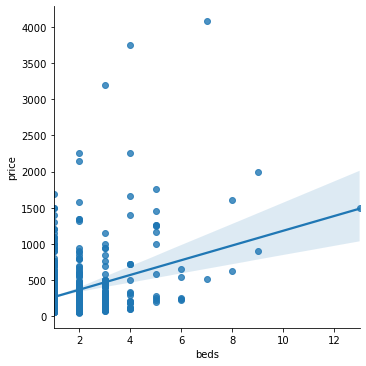

In [19]:
sns.lmplot(y="price", x='beds', data=x1 )

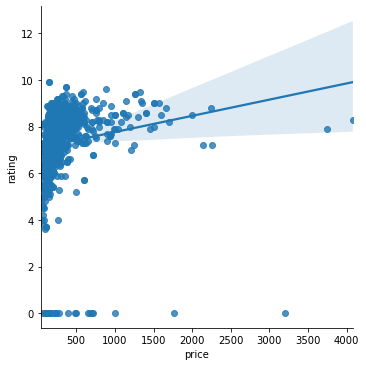

In [20]:
sns.lmplot(x="price", y='rating', data=x1 )

In [367]:
#pip install missingno


import missingno
import missingno as msno
%matplotlib inline

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:301: UserWarning:

Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:301: UserWarning:

Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.



<AxesSubplot:>

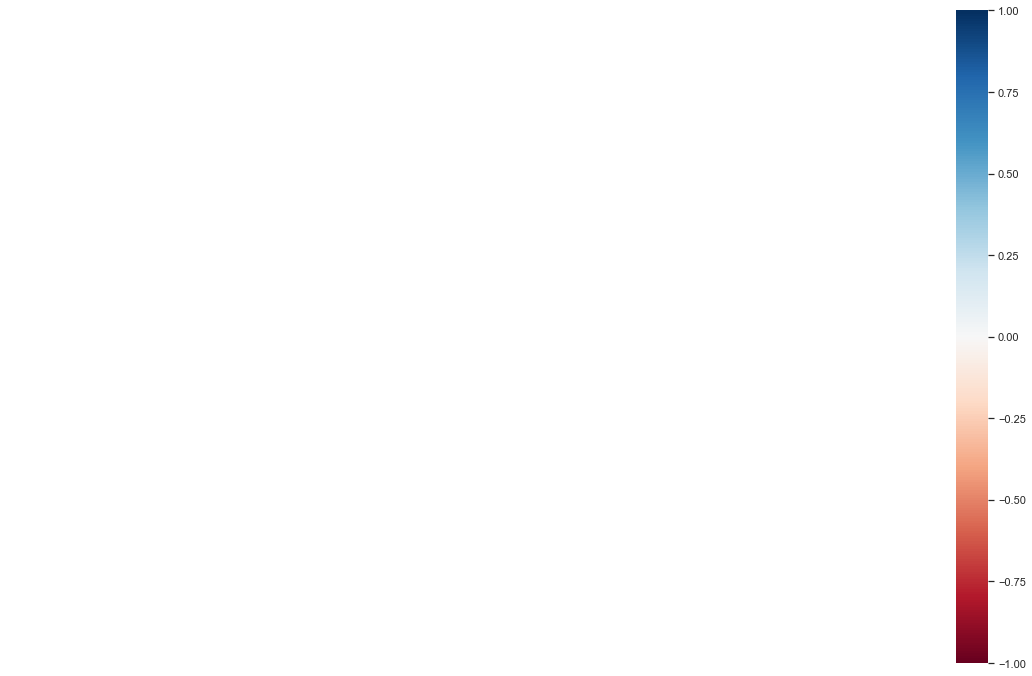

In [368]:
#plt.figure(figsize=(12, 8))
#sns.boxplot(y="beds",
#            x="price",
#           hue="Size_m2",
#            data=df4)
#plt.title("Price of room types per night and person", fontsize=16)
#plt.xlabel("Room type", fontsize=16)
#plt.ylabel("Price [EUR]", fontsize=16)
#plt.legend(loc="upper right")
#plt.ylim(0, 600)
#plt.show()

msno.heatmap(cor2)

<AxesSubplot:>

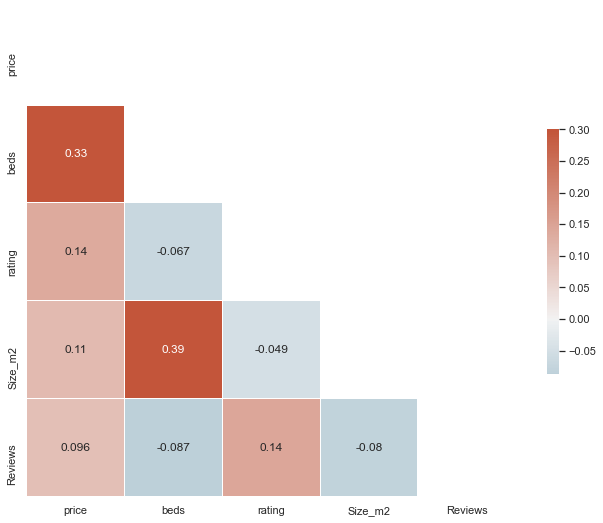

In [362]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cor2, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True )

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Size_m2'>

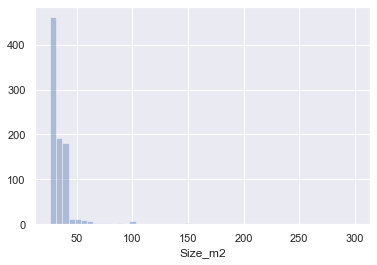

In [351]:
sns.distplot(x1['Size_m2'],kde=False)

In [352]:
#x
x1

,hotel_name,location,price,room_type,beds,rating,rating_title,Reviews,per_night,Log_number_of_ratings,Log_price,Size_m2
0,رواح للوحدات السكنية,Taif,190,One-Bedroom Apartment,2,7.5,Good,180,1,5.192957,5.247024,54
1,Aloft Riyadh Hotel,Riyadh,475,"Breezy Room, Guest room, 1 King",1,8.2,Good,2947,1,7.988543,6.163315,32
2,Nourth House ApartHotel,Al Qurayyat,200,Budget Twin Room,2,7.5,Good,264,1,5.575949,5.298317,35
3,Dyar Al Hamra Hotel,Jeddah,340,Junior Suite King,1,7.7,Good,3923,1,8.274612,5.828946,28
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"Standard, Guest room, 1 King",1,8.1,Good,1032,1,6.939254,6.263398,30
...,...,...,...,...,...,...,...,...,...,...,...,...
894,Golden Sea Hotel,Obhor,340,Junior Suite,1,8.2,Good,172,1,5.147494,5.828946,30
895,Desert Rose Motel,Al Ghat,150,Family Room with Private Bathroom,1,0.0,Very good,0,1,-inf,5.010635,37
896,Golden Dune Hotel,Turayf,250,Small Double Room,1,9.0,Superb,1735,1,7.458763,5.521461,28
897,قصر البالود 2,Riyadh,127,Budget Double Room,1,8.9,Fabulous,228,1,5.429346,4.844187,30


In [1181]:
X2 = x1[['price','beds', 'rating', 'Size_m2', 'Reviews']]

# x = df3.select_dtypes(include=['float64', 'int','int64'])

In [345]:
 import plotly.express as px


fig = px.scatter(x1, x="price", y="Size_m2", trendline="ols")
fig.show()

In [355]:
import plotly.express as px
fig = px.scatter_matrix(X2)
fig.show()

In [357]:
import plotly.express as px
fig = px.scatter_matrix(x1,
    dimensions=["price", "beds", "rating", "Size_m2",'Reviews'],
    color="price")
fig.show()

In [24]:
#pip install sweetviz
import sweetviz 
#report=sv.analyze(x1)
# Generating report

my_report = sweetviz.analyze(x1)
my_report.show_html('Report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Figure size 1440x720 with 0 Axes>

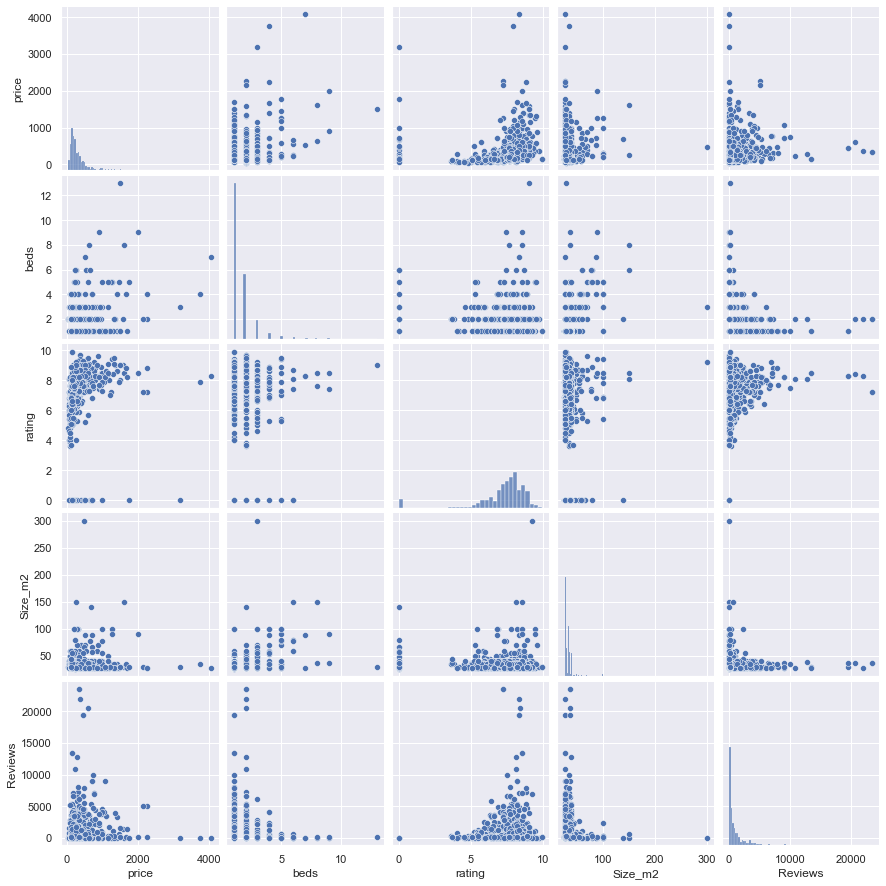

In [359]:
plt.figure(figsize=(20, 10))
sns.pairplot(X2)
plt.show()



In [371]:
#cor = x.corr()
#cor

cor2 = X2.corr()
cor2

,price,beds,rating,Size_m2,Reviews
price,1.000000,0.327643,0.138060,0.106590,0.096067
beds,0.327643,1.000000,-0.067222,0.394480,-0.086818
rating,0.138060,-0.067222,1.000000,-0.048904,0.143199
Size_m2,0.106590,0.394480,-0.048904,1.000000,-0.079989
Reviews,0.096067,-0.086818,0.143199,-0.079989,1.000000


In [361]:
import plotly.express as px

import plotly.figure_factory as ff


#df = px.data.medals_wide(indexed=True)
fig = px.imshow(cor2)
#fig = ff.create_annotated_heatmap(cor2)
fig.show()

## import plotly.express as px
from sklearn.decomposition import PCA


X3 = x1[['beds', 'rating', 'number_of_ratings', 'Size_m2']]

pca = PCA(n_components=3)
components = pca.fit_transform(X3)

total_var = pca.explained_variance_ratio_.sum() * 1

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=x1['price'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'x', '1': 'y', '2': 'z'}
)
fig.show()

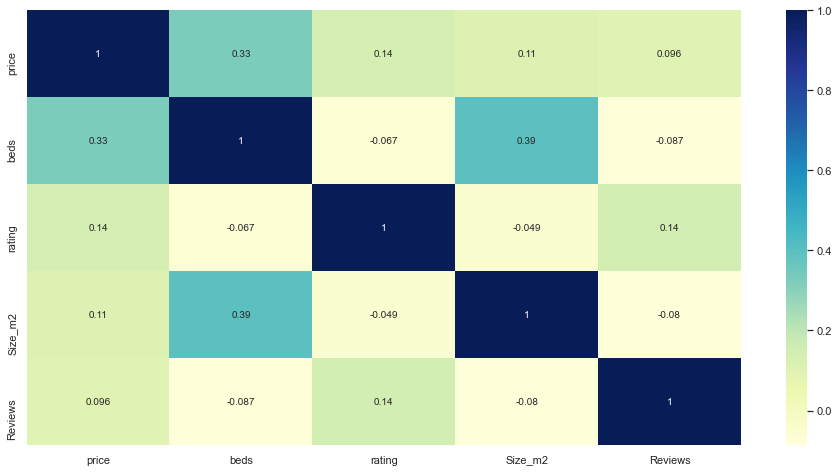

In [369]:


plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor2, cmap="YlGnBu", annot=True)
plt.show()



/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



,hotel_name,location,price,room_type,beds,rating,rating_title,Reviews,per_night,Log_number_of_ratings,Log_price,Size_m2
0,رواح للوحدات السكنية,Taif,190,One-Bedroom Apartment,2,7.5,Good,180,1,5.192957,5.247024,54
1,Aloft Riyadh Hotel,Riyadh,475,"Breezy Room, Guest room, 1 King",1,8.2,Good,2947,1,7.988543,6.163315,32
2,Nourth House ApartHotel,Al Qurayyat,200,Budget Twin Room,2,7.5,Good,264,1,5.575949,5.298317,35
3,Dyar Al Hamra Hotel,Jeddah,340,Junior Suite King,1,7.7,Good,3923,1,8.274612,5.828946,28
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"Standard, Guest room, 1 King",1,8.1,Good,1032,1,6.939254,6.263398,30
...,...,...,...,...,...,...,...,...,...,...,...,...
894,Golden Sea Hotel,Obhor,340,Junior Suite,1,8.2,Good,172,1,5.147494,5.828946,30
895,Desert Rose Motel,Al Ghat,150,Family Room with Private Bathroom,1,0.0,Very good,0,1,-inf,5.010635,37
896,Golden Dune Hotel,Turayf,250,Small Double Room,1,9.0,Superb,1735,1,7.458763,5.521461,28
897,قصر البالود 2,Riyadh,127,Budget Double Room,1,8.9,Fabulous,228,1,5.429346,4.844187,30


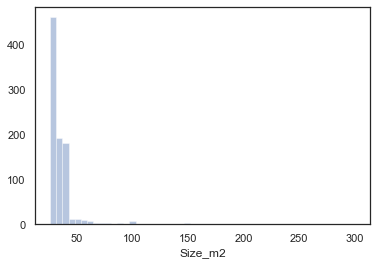

In [372]:
sns.distplot(x1['Size_m2'],kde=False)

#x1.drop(["Log_Size"])
#x1.drop([ 'Log_Size'],axis = 1, inplace=True)
x1

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



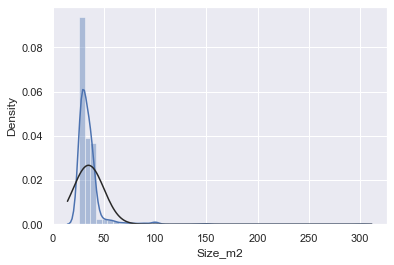

<Figure size 432x288 with 0 Axes>

In [309]:
#x1['Log_Size'] = np.log(x1['Size_m2'])
#sns.distplot(x1['Size_m2'], fit=stats.norm)
#fig = plt.figure();

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [1682]:
import plotly.express as px

fig = px.histogram(x1, x="price", y="Log_price",
                   marginal="box", # or violin, rug
                   hover_data=x1.columns)
fig.show()

In [1686]:
x1.head()

,hotel_name,location,price,room_type,beds,rating,rating_title,Reviews,per_night,Log_number_of_ratings,Log_price,Size_m2
0,رواح للوحدات السكنية,Taif,190,One-Bedroom Apartment,2,7.5,Good,180,1,5.192957,5.247024,54
1,Aloft Riyadh Hotel,Riyadh,475,"Breezy Room, Guest room, 1 King",1,8.2,Good,2947,1,7.988543,6.163315,32
2,Nourth House ApartHotel,Al Qurayyat,200,Budget Twin Room,2,7.5,Good,264,1,5.575949,5.298317,35
3,Dyar Al Hamra Hotel,Jeddah,340,Junior Suite King,1,7.7,Good,3923,1,8.274612,5.828946,28
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"Standard, Guest room, 1 King",1,8.1,Good,1032,1,6.939254,6.263398,30


In [1696]:

import plotly.figure_factory as ff
import numpy as np

import plotly.figure_factory as ff

In [1715]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import numpy as np


# data
y1 = x1['Log_price']
y2 = x1['price']

x = np.linspace(0, 1, 200)

# subplot setupt
fig = make_subplots(
    rows=3, cols=2
)

# raw data with go.Scatter
fig.add_trace(go.Scatter(x = x, 
                        y = y1,
                        hoverinfo = 'x+y',
                        mode='lines',
                        line=dict(color='rgb(0, 0, 0)',width=1),
                        showlegend=True,
                        ),
             row=1, col=1
)

fig.add_trace(
    go.Scatter(x = x, 
                y = y2,
                hoverinfo = 'x+y',
                mode='lines',
                line=dict(color='rgb(246, 52, 16)',
                width=1),
                showlegend=True,
                ),
    row=2, col=1
)



# box plots
fig.add_trace(go.Box(x=y1),
    row=1, col=2
)

fig.add_trace(go.Box(x=y2),
    row=2, col=2
)


fig.show()


hist_data = [y1, y2]
group_labels = ['Group 1', 'Group 2']
fig2 = ff.create_distplot(hist_data, group_labels)
fig2.show()



/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


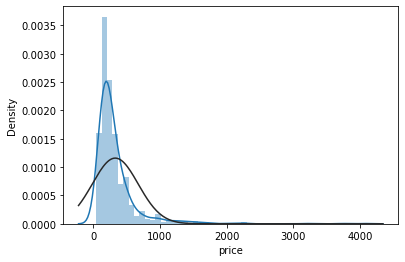

<Figure size 432x288 with 0 Axes>

In [16]:
x1['Log_price'] = np.log(x1['price'])
sns.distplot(x1['price'], fit=stats.norm)
fig = plt.figure();

In [394]:
#df3.info()
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hotel_name             899 non-null    object 
 1   location               899 non-null    object 
 2   price                  899 non-null    int64  
 3   room_type              899 non-null    object 
 4   beds                   899 non-null    int64  
 5   rating                 899 non-null    float64
 6   rating_title           899 non-null    object 
 7   Reviews                899 non-null    int64  
 8   per_night              899 non-null    int64  
 9   Log_number_of_ratings  899 non-null    float64
 10  Log_price              899 non-null    float64
 11  Size_m2                899 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 84.4+ KB


In [1683]:
#df_log['price'] = np.log(x1['price'])
#sns.distplot(df_set['price'], fit=norm)
#fig = plt.figure()

x1.head()

,hotel_name,location,price,room_type,beds,rating,rating_title,Reviews,per_night,Log_number_of_ratings,Log_price,Size_m2
0,رواح للوحدات السكنية,Taif,190,One-Bedroom Apartment,2,7.5,Good,180,1,5.192957,5.247024,54
1,Aloft Riyadh Hotel,Riyadh,475,"Breezy Room, Guest room, 1 King",1,8.2,Good,2947,1,7.988543,6.163315,32
2,Nourth House ApartHotel,Al Qurayyat,200,Budget Twin Room,2,7.5,Good,264,1,5.575949,5.298317,35
3,Dyar Al Hamra Hotel,Jeddah,340,Junior Suite King,1,7.7,Good,3923,1,8.274612,5.828946,28
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"Standard, Guest room, 1 King",1,8.1,Good,1032,1,6.939254,6.263398,30


In [1642]:
#X = df3[['beds','number_of_ratings','rating']]


#y = df3["Log_price"]

X1=  x1[['beds','Reviews','rating']]
y= x1['Log_price']



In [1198]:
X1

,beds,Reviews,rating
0,2,180,7.5
1,1,2947,8.2
2,2,264,7.5
3,1,3923,7.7
4,1,1032,8.1
...,...,...,...
894,1,172,8.2
895,1,0,0.0
896,1,1735,9.0
897,1,228,8.9


In [1199]:
y

0      5.247024
1      6.163315
2      5.298317
3      5.828946
4      6.263398
         ...   
894    5.828946
895    5.010635
896    5.521461
897    4.844187
898    4.700480
Name: Log_price, Length: 899, dtype: float64

In [411]:
#pd.DataFrame(y).fillna(0)

,Log_price
0,5.247024
1,6.163315
2,5.298317
3,5.828946
4,6.263398
...,...
894,5.828946
895,5.010635
896,5.521461
897,4.844187


In [412]:
np.any(np.isnan(log_x_data))

NameError: name 'log_x_data' is not defined

In [413]:
np.all(np.isfinite(log_x_data))

NameError: name 'log_x_data' is not defined

In [574]:
df3['number_of_ratings'] = pd.to_numeric(df3['number_of_ratings'], downcast='float')
df3['price'] = pd.to_numeric(df3['price'], downcast='float')
df3['beds'] = pd.to_numeric(df3['beds'], downcast='float')





#df3 = df3['number_of_ratings'].apply(pd.to_numeric, errors='coerce')

In [1255]:

df3['beds'].astype(int)
df3['beds'] = df3['beds'].apply(np.int64)

df3.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         899 non-null    object 
 1   location           899 non-null    object 
 2   price              899 non-null    int64  
 3   room_type          899 non-null    object 
 4   beds               899 non-null    int64  
 5   rating             899 non-null    float64
 6   rating_title       899 non-null    object 
 7   number_of_ratings  899 non-null    int64  
 8   per_night          899 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 63.3+ KB


In [1458]:
#dummies = pd.get_dummies(dfcategorical, drop_first=True)
#cdummies.head()

,rating,beds,number_of_ratings,Fabulous,Good,Superb,Very good,Fabulous,Good,Superb,Very good
0,0.115765,0.269332,-0.436450,-0.327327,0.834402,-0.210083,-0.598336,-0.327327,0.834402,-0.210083,-0.598336
1,0.519373,-0.532421,0.749648,-0.327327,0.834402,-0.210083,-0.598336,-0.327327,0.834402,-0.210083,-0.598336
2,0.115765,0.269332,-0.400443,-0.327327,0.834402,-0.210083,-0.598336,-0.327327,0.834402,-0.210083,-0.598336
3,0.231082,-0.532421,1.168019,-0.327327,0.834402,-0.210083,-0.598336,-0.327327,0.834402,-0.210083,-0.598336
4,0.461715,-0.532421,-0.071233,-0.327327,0.834402,-0.210083,-0.598336,-0.327327,0.834402,-0.210083,-0.598336
...,...,...,...,...,...,...,...,...,...,...,...
894,0.519373,-0.532421,-0.439879,-0.327327,0.834402,-0.210083,-0.598336,-0.327327,0.834402,-0.210083,-0.598336
895,-4.208602,-0.532421,-0.513609,-0.327327,-1.198463,-0.210083,1.671302,-0.327327,-1.198463,-0.210083,1.671302
896,0.980639,-0.532421,0.230114,-0.327327,-1.198463,4.760031,-0.598336,-0.327327,-1.198463,4.760031,-0.598336
897,0.922981,-0.532421,-0.415875,3.055050,-1.198463,-0.210083,-0.598336,3.055050,-1.198463,-0.210083,-0.598336


In [1470]:
#dumy
#X = pd.concat([X, rate_du], axis=1)




In [20]:
#X
X1

,beds,number_of_ratings,rating
0,2,180,7.5
1,1,2947,8.2
2,2,264,7.5
3,1,3923,7.7
4,1,1032,8.1
...,...,...,...
894,1,172,8.2
895,1,0,0.0
896,1,1735,9.0
897,1,228,8.9


,beds,number_of_ratings,rating
0,2,180,7.5
1,1,2947,8.2
2,2,264,7.5
3,1,3923,7.7
4,1,1032,8.1
...,...,...,...
894,1,172,8.2
895,1,0,0.0
896,1,1735,9.0
897,1,228,8.9


In [1678]:
y


0      190
1      475
2      200
3      340
4      525
      ... 
894    340
895    150
896    250
897    127
898    110
Name: price, Length: 899, dtype: int64

In [1022]:
log_x_data = np.log(X)
#log_y_data = np.log(y)

In [1023]:
log_x_data = np.nan_to_num(log_x_data)
#log_y_data = np.nan_to_num(log_y_data)

In [1024]:
X = np.nan_to_num(X)
y = np.nan_to_num(y)

In [1025]:
#|y.columns[np.isnan(y).any()]

In [1026]:
np.isnan(X).any()



False

In [1743]:
df4.head()

,hotel_name,location,price,room_type,beds,rating,rating_title,Reviews,per_night,Log_number_of_ratings,Log_price,Size_m2
0,رواح للوحدات السكنية,Taif,190,One-Bedroom Apartment,2,7.5,Good,180,1,5.192957,5.247024,54
1,Aloft Riyadh Hotel,Riyadh,475,"Breezy Room, Guest room, 1 King",1,8.2,Good,2947,1,7.988543,6.163315,32
2,Nourth House ApartHotel,Al Qurayyat,200,Budget Twin Room,2,7.5,Good,264,1,5.575949,5.298317,35
3,Dyar Al Hamra Hotel,Jeddah,340,Junior Suite King,1,7.7,Good,3923,1,8.274612,5.828946,28
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"Standard, Guest room, 1 King",1,8.1,Good,1032,1,6.939254,6.263398,30


In [1027]:
#impute

pd.isna(X).any(), pd.isna(y).any()
X[np.isnan(X)] = np.median(X[~np.isnan(X)])
X[np.isnan(X)] = np.median(X[~np.isnan(X)])
y[np.isnan(y)] = np.median(y[~np.isnan(y)])

In [1028]:
#X =X[~X.isin([np.nan, np.inf, -np.inf]).any(1)]

In [1643]:
from sklearn.model_selection import train_test_split

In [1644]:
#df['beds'] = df['int_rate'].str.rstrip("%").astype(float)

In [1645]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer


In [1646]:
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size = 0.2, random_state=40)#train_size=0.7

In [1647]:
X_train, X_val, y_train, y_val = train_test_split(X1, y, test_size=.15, random_state=3)

In [1653]:


#scaler = PowerTransformer(method = 'yeo-johnson')

#standerazse
#scaler = RobustScaler() Normalizer(norm = 'l2')
scaler = RobustScaler()

X_train_poly_scaled = scaler.fit_transform(X_train_poly)

X_val_poly_scaled = scaler.transform(X_val_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [1654]:
r = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_train,y_train)
#lm.coef_


0.15681500719666075

In [1650]:
lm.score(X_test,y_test)

0.20145837304454917

In [1651]:
lm.score(X_val,y_val)

0.18828281245591116

In [1652]:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = RobustScaler()#StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=3) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [1410]:
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_test, y_test):.3f}')

lm_reg.fit(X_train_scaled, y_train)

print(f'Ridge Regression val R^2 train: {lm_reg.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression val R^2 val: {lm_reg.score(X_val_scaled, y_val):.3f}')
print(f'Ridge Regression val R^2 test: {lm_reg.score(X_test_scaled, y_test):.3f}')

lm_poly.fit(X_train_poly, y_train)


print(f'Degree 3 polynomial regression  R^2 train: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 3 polynomial regression  R^2 val: {lm_poly.score(X_val_poly, y_val):.3f}')
print(f'Degree 3 polynomial regression  R^2 test: {lm_poly.score(X_test_poly, y_test):.3f}')
print(" below with scale")
print(f'Degree 3 polynomial regression  R^2 train: {lm_poly.score(X_train_poly_scaled, y_train):.3f}')
print(f'Degree 3 polynomial regression  R^2 val: {lm_poly.score(X_val_poly_scaled, y_val):.3f}')
print(f'Degree 3 polynomial regression  R^2 test: {lm_poly.score(X_test_poly_scaled, y_test):.3f}')

Linear Regression val R^2: 0.157
Linear Regression val R^2: 0.188
Linear Regression val R^2: 0.201
Ridge Regression val R^2 train: 0.157
Ridge Regression val R^2 val: 0.188
Ridge Regression val R^2 test: 0.201
Degree 3 polynomial regression  R^2 train: 0.388
Degree 3 polynomial regression  R^2 val: 0.436
Degree 3 polynomial regression  R^2 test: 0.512
 below with scale
Degree 3 polynomial regression  R^2 train: -1.688
Degree 3 polynomial regression  R^2 val: -1.443
Degree 3 polynomial regression  R^2 test: -0.825


In [1552]:
lm_poly.predict(X_test_poly)

array([5.5131287 , 5.69393794, 4.90772228, 6.08037384, 5.83870458,
       5.74144799, 6.11725447, 6.15469287, 5.91958998, 5.61616257,
       5.688833  , 5.39954242, 5.72286969, 5.22617804, 5.8008803 ,
       5.56817591, 5.28390366, 5.107215  , 5.53418796, 5.64410805,
       5.48840145, 5.38422978, 5.78575762, 5.68849582, 7.29143009,
       5.65951884, 5.9389616 , 4.82600063, 5.6252301 , 4.97015797,
       7.30203133, 5.0059689 , 5.68108148, 5.45565107, 5.76848303,
       5.56883568, 4.90968684, 5.53467938, 5.85203763, 4.78534615,
       5.26663809, 5.82658326, 5.63421879, 5.42911027, 5.55696714,
       5.01755701, 5.33097338, 6.0360776 , 5.47565113, 5.48502337,
       6.60051731, 5.51790836, 5.2631655 , 5.44030322, 5.93064962,
       5.28241582, 5.17948584, 5.57258777, 5.44784849, 5.49565148,
       5.70947831, 5.29280801, 5.10243965, 5.73460239, 5.25489115,
       7.20091415, 5.13045811, 5.50210538, 7.90120884, 5.1932338 ,
       5.22640721, 6.00290719, 5.64508752, 5.77858718, 5.56281

In [1365]:
preds_lr = lm_reg.predict(X_test_scaled) # ridge scaled
mean_absolute_error(y_test, preds_lr)

0.470541096404988

In [1366]:
preds_lr_poly = lm_poly.predict(X_test_poly) # poly without scale
mean_absolute_error(y_test, preds_lr_poly)

0.3693573903067503

In [1367]:
preds_lr_poly = lm_poly.predict(X_test_poly_scaled) # poly dgree 3  scaled
mean_absolute_error(y_test, preds_lr_poly)

0.8046935342518974

536    0.559913
538   -0.467078
852    0.134227
741   -0.432026
537    0.126842
         ...   
358   -0.008022
371   -0.159680
318   -0.227038
283    0.451078
805    0.400439
Name: Log_price, Length: 180, dtype: float64


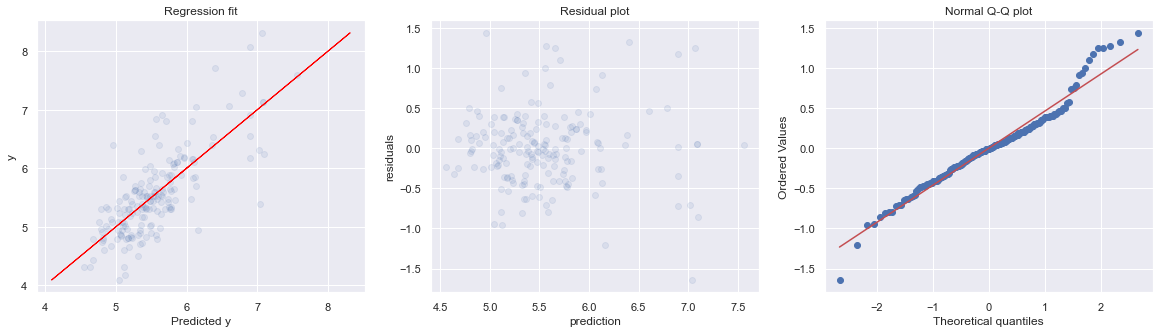

In [1220]:
sns.set(style='darkgrid')
diagnostic_plot(X_test_poly_scaled,y_test )

In [1221]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)


0.38841590379647506

In [1222]:
lr_poly.score(X_val_poly, y_val)



0.43645941596588933

In [1223]:
lr_poly.score(X_test_poly, y_test)

0.5116187912042565

In [792]:
preds_lr_poly = lr_poly.predict(X_train_poly) # generate predictions (on training data) using fit model||

In [793]:

mean_absolute_error(y_train, preds_lr_poly)
#MAE(y_train,preds_lr_poly)

0.40034063938927317

In [794]:
#print("MAE", metrics.mean_absolute_error(y_test, pred))

In [1484]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    
 
    fig = px.scatter(x=np.exp(pred), y=np.exp(y), opacity=0.65,title="Regression Fit",labels=dict(y='y (Saudi Riyal)', x='y Predicted (Saudi Riyal) '),
    trendline="ols", trendline_scope="overall")
    fig.show()
    
  
    
  
    
    plt.subplot(1, 3, 1)
    plt.scatter(pred,y,alpha=0.1)
    plt.plot(y, y, color='red',linewidth=1,)
    plt.title("Regression fit")
    plt.xlabel("Predicted y")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    print(res)    
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt,)
    plt.title("Normal Q-Q plot")

In [1485]:
import plotly.express as px
import plotly.graph_objects as go



92    -0.335064
734   -0.145308
155    0.232447
800   -0.016860
825    0.123138
         ...   
550    0.354928
124    0.033581
192    0.184873
41     0.243101
891   -0.050880
Name: Log_price, Length: 135, dtype: float64


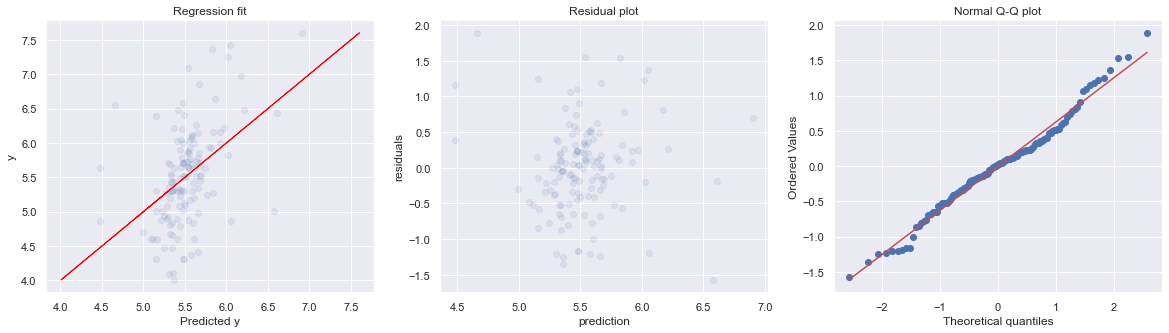

In [1486]:
#sns.set(style='darkgrid')
diagnostic_plot(X_val_scaled, y_val)

536    0.559930
538   -0.467056
852    0.134248
741   -0.432041
537    0.126833
         ...   
358   -0.008022
371   -0.159668
318   -0.227037
283    0.451092
805    0.400460
Name: Log_price, Length: 180, dtype: float64


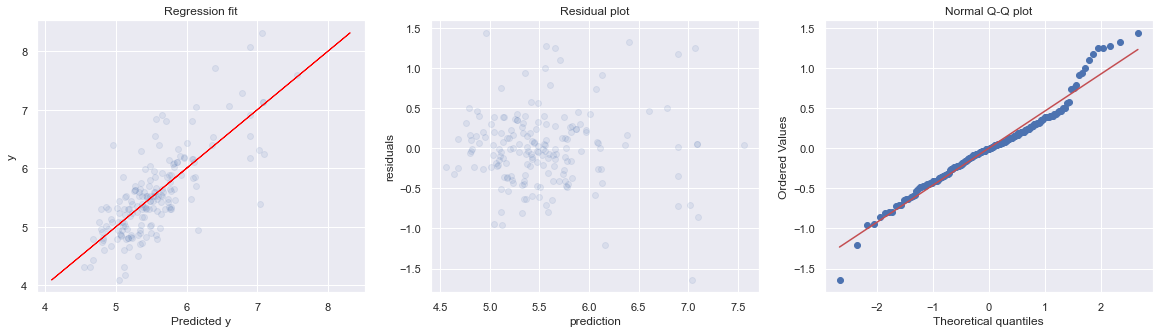

In [798]:
sns.set(style='darkgrid')
diagnostic_plot(X_test_poly, y_test)



In [799]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

df = px.data.tips()
X = df.total_bill.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, df.tip)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

fig = px.scatter(df, x='total_bill', y='tip', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()

0     -0.305848
1      0.553896
2     -0.258464
3      0.230179
4      0.754325
         ...   
894    0.348684
895    0.458069
896   -0.121274
897   -0.717191
898   -0.421167
Name: Log_price, Length: 899, dtype: float64


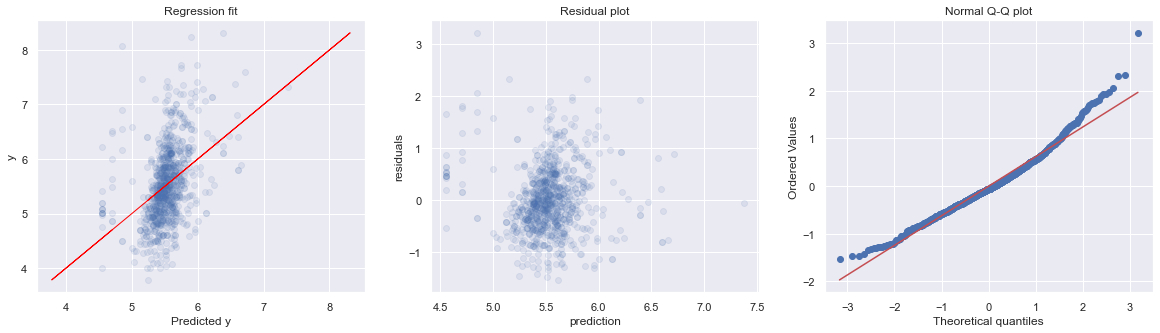

In [800]:
sns.set(style='darkgrid')
diagnostic_plot(X1, y)

lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

In [1228]:
from sklearn.linear_model import LassoCV, RidgeCV,ElasticNetCV
#from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import (cross_val_score, train_test_split, KFold, GridSearchCV)# parameter tunning
from sklearn.metrics import mean_absolute_error

In [1229]:
#lasso.score(X_val_poly_scaled, y_val) #X_val_poly

In [1230]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [1231]:
#mean_absolute_error(y_train, y_val)

In [1232]:
params = {"alpha": np.logspace(-4, -.1, 20)}
GS = GridSearchCV(Lasso(), param_grid=params, cv=kf, return_train_score=False)
GS.fit(X_train_poly_scaled, y_train)


/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 91.81433219242817, tolerance: 0.0299462336853327

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 83.18087440105694, tolerance: 0.027452026291824992

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.59048933872654, tolerance: 0.027974770551496386

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase t

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 83.68744494899332, tolerance: 0.029101643975767106

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.14633485899243, tolerance: 0.02799650432928961

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87.07983993845382, tolerance: 0.0299462336853327

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase th

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-04, 1.60421716e-04, 2.57351270e-04, 4.12847324e-04,
       6.62296762e-04, 1.06246783e-03, 1.70442913e-03, 2.73427446e-03,
       4.38637001e-03, 7.03669004e-03, 1.12883789e-02, 1.81090112e-02,
       2.90507865e-02, 4.66037703e-02, 7.47625680e-02, 1.19935395e-01,
       1.92402418e-01, 3.08655261e-01, 4.95150067e-01, 7.94328235e-01])})

In [1291]:
lasso = LassoCV(GS.best_estimator_.alpha)
lasso.fit(X_train_poly_scaled,y_train)
lasso.score(X_train_poly_scaled,y_train)

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass eps=0.004386370005779536 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03325300121827013, tolerance: 0.03012648402596612

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09327605047377574, tolerance: 0.02829408296785447

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of itera

0.24312077217304084

In [1298]:
lasso.score(X_val_poly_scaled, y_val)



0.26542156369800207

In [1296]:
lasso.predict(X_val_poly_scaled) # ridge scaled

X_val_poly_scaled

array([5.25035375, 5.55589159, 5.87762377, 5.43914756, 5.64573595,
       5.52597796, 5.55506543, 5.0948856 , 5.58095941, 6.28367147,
       5.18820323, 5.25530536, 5.57400863, 5.56246862, 5.92281762,
       5.74362671, 5.56898522, 5.2248638 , 5.58678623, 5.25704619,
       5.52904633, 5.5378123 , 5.50649982, 5.56756136, 5.49351594,
       5.41914608, 5.34400148, 5.38361335, 5.74569893, 5.31289043,
       5.66404789, 5.52451263, 5.38726309, 5.49572595, 5.63799228,
       5.36793236, 5.28670565, 5.43116685, 5.52673738, 5.15335262,
       5.30093244, 5.53362393, 5.19912099, 5.52577493, 5.31947057,
       5.63911384, 5.61339603, 5.60273015, 5.28447142, 5.36296481,
       5.51857661, 5.47792099, 5.80626506, 5.43395056, 5.55219901,
       5.35225627, 5.64273679, 5.62311959, 5.32721926, 5.25408231,
       5.59068422, 5.51356626, 5.71394156, 5.15794907, 5.12036573,
       5.50046745, 5.4275111 , 5.38517553, 5.31985404, 5.84851732,
       5.53243784, 5.8908173 , 5.5427631 , 5.71214752, 5.39830

In [1306]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X1)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

lasso = LassoCV(GS.best_estimator_.alpha)
lasso.fit(X_poly_scaled,y)

# Apply the same polynomial and scaling transformations to test set, then score
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

lasso.score(X_test_poly_scaled, y_test)

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass eps=0.004386370005779536 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



ValueError: X has 3 features, but PolynomialFeatures is expecting 4 features as input.

In [1098]:
#diagnostic_plot(X_test_poly_scaled, y_test)

92    -0.165563
734   -0.222042
155   -0.030898
800    0.391736
825    0.347126
         ...   
550    0.069911
124   -0.159773
192    0.202938
41     0.280472
891    0.039628
Name: Log_price, Length: 135, dtype: float64


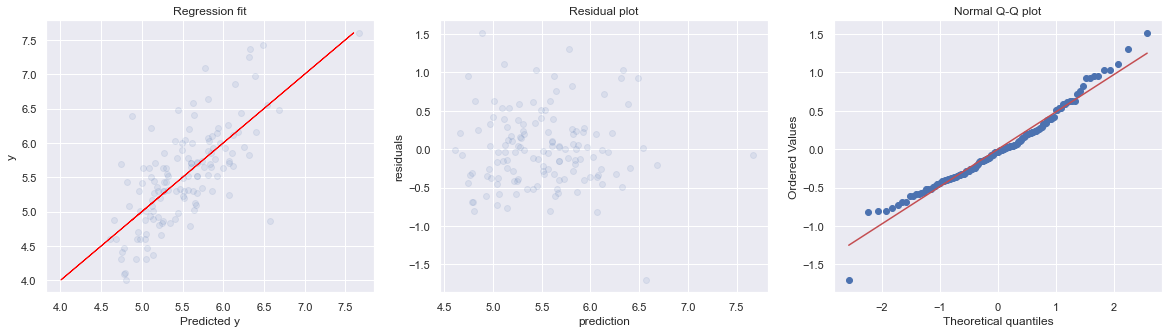

In [1099]:
sns.set(style='darkgrid')
diagnostic_plot(X_val_poly_scaled, y_val)

#import matplotlib.pyplot as plt


#plt.scatter(X,y)
#plt.plot(X,y_val)

In [1307]:
ridge = RidgeCV(GS.best_estimator_.alpha)
ridge.fit(X_train_poly_scaled,y_train)
ridge.score(X_train_poly_scaled,y_train)

0.3883919894431188

In [1101]:
#ridge.score(X_val_poly_scaled, y_val)

In [1102]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X1)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

ridge = RidgeCV(GS.best_estimator_.alpha)
ridge.fit(X_poly_scaled,y)

# Apply the same polynomial and scaling transformations to test set, then score
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

ridge.score(X_test_poly_scaled, y_test)

0.5143823377739318

In [ ]:
preds_lr = lm_reg.predict(X_test_scaled) # ridge scaled
mean_absolute_error(y_test, preds_lr)

In [1224]:
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import make_pipeline

In [1282]:
elastic = ElasticNetCV(GS.best_estimator_.alpha)
elastic.fit(X_train_poly_scaled,y_train)
elastic.score(X_train_poly_scaled,y_train)

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass l1_ratio=0.004386370005779536 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



0.17326660808826433

In [1308]:
preds = elastic.predict() # ridge scaled

TypeError: predict() missing 1 required positional argument: 'X'

In [1280]:

mean_absolute_error(y_test, preds)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 35 is different from 20)

In [1226]:
#elastic.score(X_val_poly_scaled, y_val)

In [1227]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X1)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)


elastic.fit(X_poly_scaled,y)

# Apply the same polynomial and scaling transformations to test set, then score
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

elastic.score(X_test_poly_scaled, y_test)

0.4122358530792525

In [1316]:
elastic.fit(X_train_poly,y_train)

#pp = elastic.predict(X_test_poly_scaled)
#mean_absolute_error(pp, y_test)

ElasticNetCV(l1_ratio=0.004386370005779536)

In [1310]:
poly = make_pipeline(PolynomialFeatures(3), lasso)
poly.fit(X_train,y_train)
predicted = poly.predict(X_val)
predicted
np.exp(predicted)

pc = poly.predict(X_test)


In [1311]:
mean_absolute_error(y_test, pc)

0.5264479102381951

536    0.174686
538   -0.827092
852   -0.847419
741   -1.660655
537    1.309347
         ...   
358    0.238216
371    0.157722
318    0.732844
283    0.382020
805    0.367496
Name: Log_price, Length: 180, dtype: float64


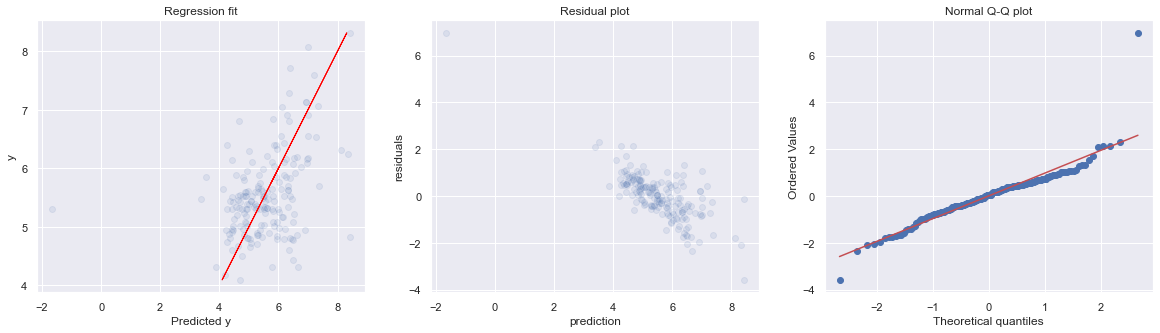

In [1108]:
sns.set(style='darkgrid')
diagnostic_plot(X_test_poly_scaled, y_test)

In [1109]:
def diagnostic_plot2(x_train, y_train, x_test, y_test):
    plt.figure(figsize=(22,8))
    
  
    
    rgr = LinearRegression()
    rgr.fit(x_train,y_train)
    pred = rgr.predict(x_test)    

    plt.subplot(1, 2, 1)
    plt.scatter(pred,y_test,alpha=0.1)
    plt.plot(y_test, y_test, color='red',linewidth=1,label='Identity Line (Log Market Value)')
    plt.title("Regression Fit on Test Set",weight='bold')
    plt.xlabel("Log Predicted Market Value")
    plt.ylabel("Log Market Value")
    plt.legend(loc='lower right')
    sns.despine()
    
    plt.subplot(1, 2, 2)
    res = np.array(y_test).reshape(-1,1) - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual Plot on Test Set",weight='bold')
    plt.xlabel("Log Predicted Market Value")
    plt.ylabel("Residuals")
    sns.despine()

536    0.174686
538   -0.827092
852   -0.847419
741   -1.660655
537    1.309347
         ...   
358    0.238216
371    0.157722
318    0.732844
283    0.382020
805    0.367496
Name: Log_price, Length: 180, dtype: float64


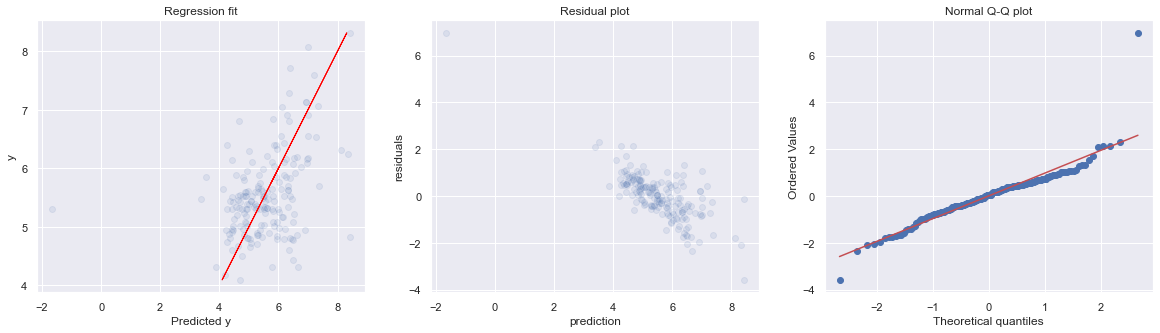

In [1110]:
#sns.set(style='darkgrid')
diagnostic_plot(X_test_poly_scaled, y_test)

In [1111]:
# last prect
poly = make_pipeline(PolynomialFeatures(3), Lasso())
poly.fit(X_train,y_train)
predicted = poly.predict(X_val)
predicted
np.exp(predicted)
#poly.score(y_test,predicted)


/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 129.95945009501116, tolerance: 0.03562300466340887



array([174.87664659, 236.93665502, 428.87023428, 226.27033945,
       294.3619338 , 268.83919235, 255.81351662, 136.75899643,
       287.36049373, 550.91082998, 157.67293501, 175.66505426,
       306.19233541, 274.06207113, 374.58972516, 418.1646635 ,
       272.91655068, 166.13725303, 256.40330995, 168.69434382,
       258.57222243, 261.6092482 , 196.43362035, 252.15769839,
       242.40590049, 211.27325431, 204.79872881, 200.46816372,
       375.17776999, 185.76002143, 299.21708471, 291.39337272,
       203.71558464, 236.67943066, 364.63803437, 196.71263652,
       170.55720223, 220.95701027, 291.46170313, 150.0869932 ,
       186.92759719, 263.68711066, 161.81531685, 251.74263022,
       190.2566998 , 276.74441998, 343.8654285 , 255.51470714,
       178.63376762, 192.35709284, 272.5202627 , 231.97839568,
       510.92443971, 218.64035828, 286.37665219, 192.77216535,
       345.69056382, 353.01355175, 195.21180563, 171.13213043,
       331.43779471, 267.79491037, 318.06258804, 146.93

In [1321]:
enet_model = ElasticNet().fit(X_train, y_train)

In [1323]:
pcv=enet_model.predict(X_test)

In [1324]:
mean_absolute_error(y_test, pcv)

0.5142833851976883

In [1332]:
enet_cv_model = ElasticNetCV(cv = 10).fit(X_train,y_train)

In [1333]:
pcvc=enet_cv_model.predict(X_test)

mean_absolute_error(y_test, pcvc)


0.5125660284818917

In [1327]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)
y_pred = enet_tuned.predict(X_test)

In [1328]:
mean_absolute_error(y_test,y_pred  )

0.5125660284818917

In [1112]:
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import explained_variance_score, mean_squared_error
import numpy as np
import pylab as pl

In [1113]:
from sklearn.linear_model import HuberRegressor
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=42)
pipe = make_pipeline(StandardScaler(),  HuberRegressor())
pipe.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('huberregressor', HuberRegressor())])

In [1114]:
pipe.score(X_test, y_test)



0.14463855160651962

In [1115]:
yp=pipe.predict(X_val)
#pipe.score(y_test, p)



In [1254]:
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test, pred))
print("MSE", metrics.mean_squared_error(y_test, pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, pred)))



MAE 0.4705215316293433
MSE 0.41313684303989917
RMSE 0.642757219360389


In [1117]:
#plt.scatter(X_test, y_test)

In [1118]:
#sns.distplot((X_test-X_val_poly), bins=50)

In [1242]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [1243]:
lm = LinearRegression(fit_intercept=True)

In [1244]:
lm.fit(X_train, y_train)

LinearRegression()

In [1245]:
coeff_df= pd.DataFrame(lm.coef_,X1.columns,columns=["Coefficient"])

In [1246]:
print(coeff_df)
print("   ")
print(lm.coef_) #m    same coeff
print(lm.intercept_) #b

         Coefficient
beds        0.146562
Reviews     0.000044
rating      0.108873
   
[1.46562403e-01 4.35992296e-05 1.08873318e-01]
4.4381551429202055


In [1247]:
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))



0.20145837304454917


In [1248]:

lm.score(X_train,y_train)

0.15681500719666075

In [1249]:
lm.score(X_val,y_val)

0.18828281245591116

In [1250]:
lm.score(X_train,y_train)

0.15681500719666075

In [1335]:
pred= lm.predict(X_test)
preds_lr = lm.predict(X_train) # generate predictions (on training data) using fit model

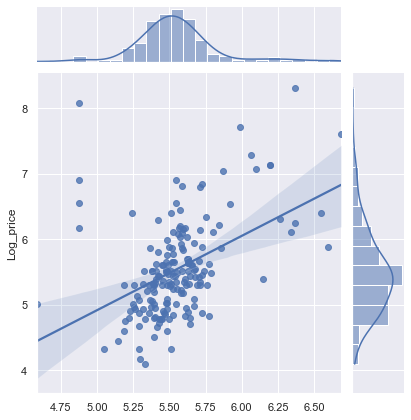

In [1253]:


sns.jointplot(x=pred,y=y_test, kind='reg')

Mean Absolute Error: 0.47 degrees.
Accuracy: 91.61 %.


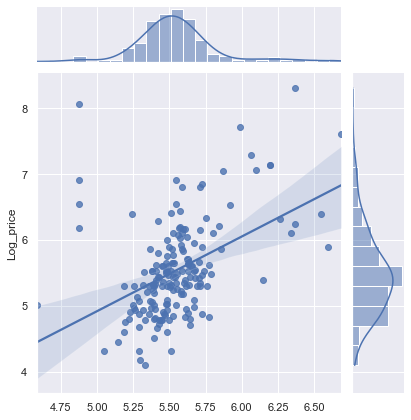

In [1510]:
errors = abs(pred -  y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')



mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')



In [1337]:
#MAE(y_train,preds_lr)

print("MAE", metrics.mean_absolute_error(y_test, pred))

MAE 0.4705215316293433


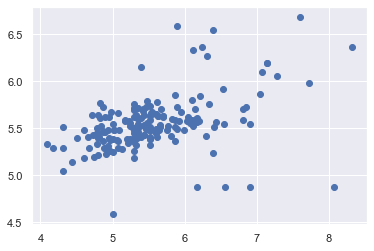

In [1255]:
plt.scatter(y_test, pred)

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Log_price', ylabel='Density'>

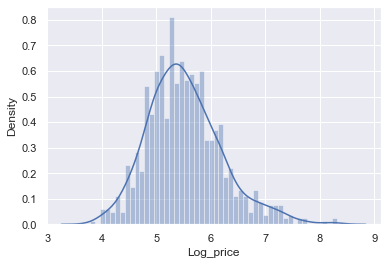

In [1258]:
sns.distplot(y, bins=50) #error assuimtions 

In [1259]:
model = sm.OLS(y_train, X_train)

#table = sm.stats.anova_lm(moore_lm, typ=2)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Log_price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              5638.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                        0.00
Time:                        21:02:04   Log-Likelihood:                         -1193.7
No. Observations:                 764   AIC:                                      2393.
Df Residuals:                     761   BIC:                                      2407.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
beds           0.4906      0.036     13.643      0.000       0.420       0.561
Reviews      4.64e-05   1.74e-05      2.660      0.008    1.22e-05    8.07e-05
rating         0.6122      0.010     62.076      0.000       0.593       0.632
==============================================================================
Omnibus:                      353.426   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2375.611
Skew:                           1.979   Prob(JB):                         0.00
Kurtosis:                      10.679   Cond. No.                     2.39e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1260]:
from sklearn import metrics

In [1261]:
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test, pred))
print("MSE", metrics.mean_squared_error(y_test, pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, pred)))



MAE 0.4705215316293433
MSE 0.41313684303989917
RMSE 0.642757219360389


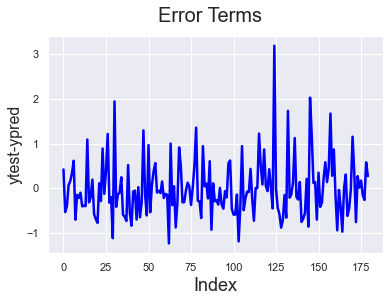

In [1262]:
c = [i for i in range(len(pred))]
fig = plt.figure()
plt.plot(c,y_test-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

In [1263]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectFromModel

In [1264]:
#vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
#vif["features"] = X1.columns
#type(x1)


xx = x1[['Log_price','Reviews','rating','beds']]

#XX =  x1[['Log_price','Reviews','rating','beds']]

In [1265]:
vif_data = pd.DataFrame()
vif_data["feature"] = xx.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(xx.values, i)
                          for i in range(len(xx.columns))]
  
print(vif_data)

     feature        VIF
0  Log_price  24.098882
1    Reviews   1.311794
2     rating  19.750120
3       beds   3.384291


In [1266]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor



In [1267]:
#gb = GradientBoostingClassifier()
#gb.fit(X_train, y_train)

#y_pred_gb = gb.predict(X_test)
#
#acc_gb = accuracy_score(y_test, y_pred_gb)
#report_gb = classification_report(y_test, y_pred_gb)

#print("Accuracy Score of the Gradient Boosting Classifier:", acc_gb)
#print("Classification report: \n", report_gb)


In [1268]:
#rf = RandomForestRegressor()
#rf.fit(X_train, y_train)

#y_pred_rf = rf.predict(X_test)
#cc_rf = accuracy_score(y_test, y_pred_rf)
#report_rf = classification_report(y_test, y_pred_rf)

#print("Accuracy Score of the Random Forest model:", acc_rf)
#print("Classification report: \n", report_rf)


<Figure size 720x360 with 0 Axes>

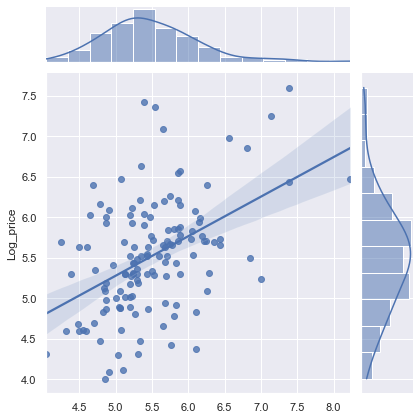

In [1269]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_splitx_train


forest_reg = RandomForestRegressor(n_estimators=1, random_state=10)
forest_reg.fit(X_train, y_train)
#y_hat = forest_reg.predict(X_val)
fig = plt.figure(figsize=(10,5))
#plt.scatter(X_test, y_val, label="Truth")
#plt.xlabel("X")
#plt.ylabel("Y")
#plt.legend(loc="upper left")

sns.jointplot(x=y_hat,y=y_val, kind='reg')

Mean Absolute Error: 0.27 degrees.
Accuracy: 95.18 %.


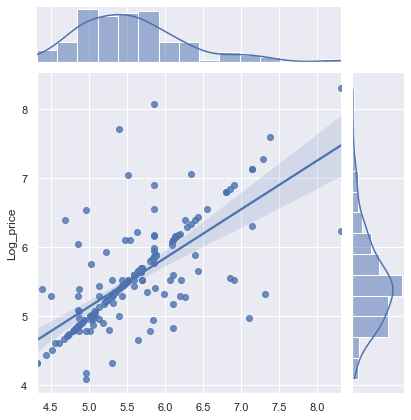

In [1270]:
# Use the forest's predict method on the test data
predi = forest_reg.predict(X_test)
# Calculate the absolute errors
errors = abs(predi -  y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')



mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

sns.jointplot(x=predi,y=y_test, kind='reg')

In [1511]:
fig = px.scatter(x=predi, y=y_test, opacity=0.65,title="Regression Fit",labels=dict(y='y (Saudi Riyal)', x='y Predicted (Saudi Riyal) '),
trendline="ols", trendline_scope="overall")
fig.show()
    
  

In [1271]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X1, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
#regr.fit(X1, y)
regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=0)

In [1272]:
regr.predict(X_test)

array([5.69764584, 5.74177547, 5.07137671, 5.75373316, 5.74542144,
       5.70503298, 5.76407814, 5.76033696, 5.76033696, 5.70917829,
       5.74177547, 5.60866749, 5.74177547, 5.11422546, 5.72728567,
       5.71989854, 5.44979105, 5.09834805, 5.47878442, 5.75552291,
       5.60866749, 5.43926847, 5.7380343 , 5.69764584, 6.65570006,
       5.47319772, 5.61918043, 5.04262909, 5.17000826, 5.04262909,
       6.70950035, 5.04262909, 5.69764584, 5.69764584, 5.70503298,
       5.50786847, 5.04262909, 5.69764584, 5.74542144, 5.04262909,
       5.13900203, 5.7380343 , 5.69764584, 5.50426283, 5.69764584,
       5.23841559, 5.50426283, 5.2981408 , 5.60866749, 5.69764584,
       6.55293811, 5.71989854, 5.13900203, 5.11422546, 5.61918043,
       5.49788036, 5.11422546, 5.69764584, 5.60866749, 5.58638273,
       5.71989854, 5.43926847, 5.11025441, 5.74177547, 5.53040506,
       6.55293811, 5.11025441, 5.69764584, 6.6456938 , 5.11422546,
       5.44979105, 5.75530524, 5.69764584, 5.70503298, 5.69764

In [1721]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.05)


# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
#y_pred

#print(np.concatenate((y_pred.(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
print(regressor.score(X_train,y_train))
print(regressor.score(X_val,y_val))
print(regressor.score(X_test,y_test))

0.8583802983277106
0.33101774987495924
0.7820982884745452


In [1656]:
# Use the forest's predict method on the test data
predictions = regressor.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions -  y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.19 degrees.


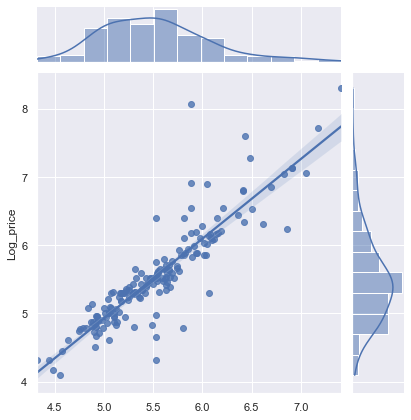

In [1657]:
sns.jointplot(x=predictions,y=y_test, kind='reg')

In [1658]:




mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 96.68 %.


In [1718]:

fig = px.scatter(x=predictions, y=y_test, opacity=0.65,title="Regression Fit",labels=dict(y=' og-price (Saudi Riyal)', x='log-price Predicted (Saudi Riyal) '),
trendline="ols", trendline_scope="overall",template='plotly_dark' )
fig.update_xaxes(showgrid=True)
fig.data[1].line.color = 'red'
fig.show()  

    
  #template='plotly_dark'

In [1801]:
dKK = pd.DataFrame({'log-price':np.exp(y_test), 'log-price (Predicted)':np.exp(predictions)})

In [1802]:
dKK

,log-price,log-price (Predicted)
536,420.0,407.811031
538,150.0,157.861467
852,162.0,158.193931
741,299.0,310.881117
537,360.0,380.760178
...,...,...
358,284.0,278.906786
371,275.0,318.566326
318,225.0,228.011934
283,565.0,615.036650


In [1804]:
print(np.exp(6.010804))

407.81106860057395


In [1722]:
 res = y_test - predictions

In [1724]:

fig = px.scatter(x=predictions, y=res, opacity=0.65,title="Residual Plot",labels=dict(y=' og-price (Saudi Riyal)', x='log-price Predicted (Saudi Riyal) '),
trendline="ols", trendline_scope="overall",template='plotly_dark' )
fig.update_xaxes(showgrid=True)
fig.data[1].line.color = 'red'
fig.show()  

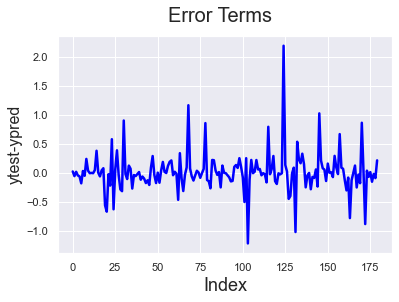

<ipython-input-1733-796fcfd0cdb0>:9: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2164: UserWarning:

`displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.



Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual eror')

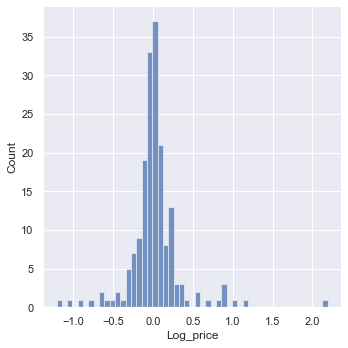

In [1733]:
c = [i for i in range(len(predictions))]
fig = plt.figure()
plt.plot(c,y_test-predictions, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

ax = f.add_subplot(122)
sns.displot((y_test - predictions),ax=ax,color='b')
ax.axvline((y_test - predictions).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror')

In [1736]:
pip install yellowbrick

     |████████████████████████████████| 271 kB 802 kB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 5.4 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
Note: you may need to restart the kernel to use updated packages.


In [1737]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Log_price', ylabel='Density'>

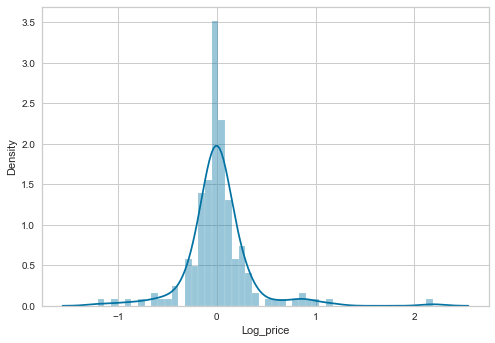

In [1755]:
sns.distplot((y_test-predictions))

In [1778]:

import plotly.express as px
fig = px.histogram( x=y_test-predictions, marginal = 'box', title="Prediction Error", 
                   labels=dict(x='Log_price(Saudi Riyal)'),template='plotly_dark' )
fig.show()

In [1771]:
fig = px.scatter(x=np.exp(pred), y=np.exp(y), opacity=0.65,title="Regression Fit",labels=dict(y='y (Saudi Riyal)', x='y Predicted (Saudi Riyal) '),
    trendline="ols", trendline_scope="overall",template='plotly_dark' )
    fig.show()
    
  
    
  

ValueError: All arguments should have the same length. The length of argument `y` is 899, whereas the length of  previously-processed arguments ['x'] is 180

In [1768]:
fig = px.scatter(x=y_test, y=predictions,
    marginal_x='histogram', marginal_y='histogram',
     trendline='ols'
)
fig.update_traces(histnorm=y_test-predictions, selector={'type':'histogram'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)

fig.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

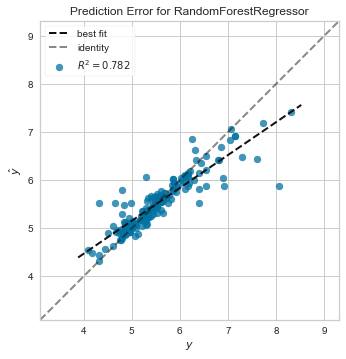

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [1744]:
visualizer = PredictionError(regressor)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

In [1637]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

dff = px.data.tips()
X = dff.total_bill[:, None]
print(X )
X_train, X_test, y_train, y_test = train_test_split(X, dff.tip, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))


fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range, y=y_range, name='prediction')
])
fig.show()

[[16.99]
 [10.34]
 [21.01]
 [23.68]
 [24.59]
 [25.29]
 [ 8.77]
 [26.88]
 [15.04]
 [14.78]
 [10.27]
 [35.26]
 [15.42]
 [18.43]
 [14.83]
 [21.58]
 [10.33]
 [16.29]
 [16.97]
 [20.65]
 [17.92]
 [20.29]
 [15.77]
 [39.42]
 [19.82]
 [17.81]
 [13.37]
 [12.69]
 [21.7 ]
 [19.65]
 [ 9.55]
 [18.35]
 [15.06]
 [20.69]
 [17.78]
 [24.06]
 [16.31]
 [16.93]
 [18.69]
 [31.27]
 [16.04]
 [17.46]
 [13.94]
 [ 9.68]
 [30.4 ]
 [18.29]
 [22.23]
 [32.4 ]
 [28.55]
 [18.04]
 [12.54]
 [10.29]
 [34.81]
 [ 9.94]
 [25.56]
 [19.49]
 [38.01]
 [26.41]
 [11.24]
 [48.27]
 [20.29]
 [13.81]
 [11.02]
 [18.29]
 [17.59]
 [20.08]
 [16.45]
 [ 3.07]
 [20.23]
 [15.01]
 [12.02]
 [17.07]
 [26.86]
 [25.28]
 [14.73]
 [10.51]
 [17.92]
 [27.2 ]
 [22.76]
 [17.29]
 [19.44]
 [16.66]
 [10.07]
 [32.68]
 [15.98]
 [34.83]
 [13.03]
 [18.28]
 [24.71]
 [21.16]
 [28.97]
 [22.49]
 [ 5.75]
 [16.32]
 [22.75]
 [40.17]
 [27.28]
 [12.03]
 [21.01]
 [12.46]
 [11.35]
 [15.38]
 [44.3 ]
 [22.42]
 [20.92]
 [15.36]
 [20.49]
 [25.21]
 [18.24]
 [14.31]
 [14.  ]
 

<ipython-input-1637-021738cb6d37>:8: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = px.data.tips()
X = df.total_bill[:, None]
X_train, X_test, y_train, y_test = train_test_split(X, df.tip, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))


fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range, y=y_range, name='prediction')
])
fig.show()



In [1725]:
hist(errors)


In [1589]:
import plotly.express as px
df = px.data.iris()fig = px.scatter_3d(x=predictions, y='sepal_width', z='petal_width',
                    color='petal_length', symbol='species')
fig.show()

#y_pred = regressor.predict(X_test)



3
('beds', 0.15537831664963328)
('Reviews', 0.4262360922776186)
('rating', 0.41838559107274814)


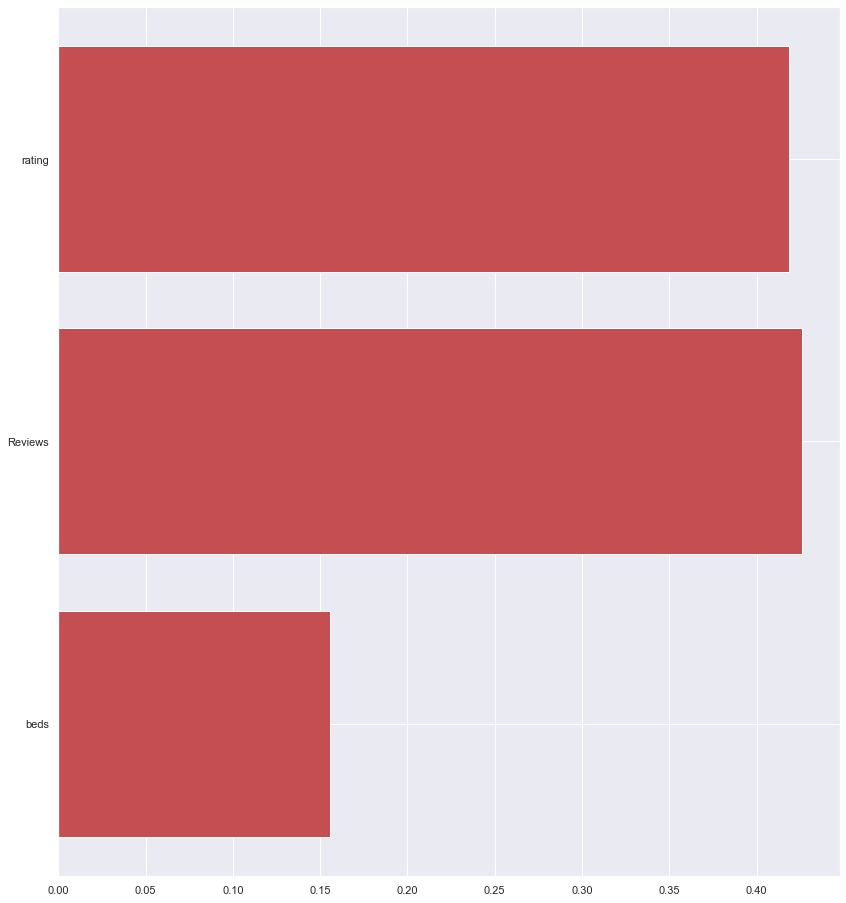

In [1411]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

   

print(len(X1.columns))

allvarlist = list()

for each_var in X1.columns:
    allvarlist.append(each_var)

countvar = len(allvarlist)

allvar = X1[allvarlist]
allvar = allvar.values.reshape(len(allvar),countvar)

target = y
target=target.values.reshape(len(target),1)

allvar_train,allvar_test,target_train,target_test= train_test_split(X1,y, random_state=0, test_size=0.3)

clf = RandomForestRegressor(n_estimators=10, random_state=0, n_jobs=-1)

#print(allvar_train)
#print(target_train)

clf.fit(allvar_train,np.ravel(target_train))


for feature in zip(allvarlist, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure().set_size_inches(14,16)
plt.barh(range(allvar_train.shape[1]), importances, color="r")
plt.yticks(range(allvar_train.shape[1]),allvarlist)


y_pred = clf.predict(allvar_test)

In [1745]:
df = pd.DataFrame({'Real Values':np.exp(target_test), 'Predicted Values':np.exp(y_pred)})
df

ValueError: array length 180 does not match index length 270

In [1438]:
print((y_test-pee).mean())   #NO bias  #prediction bais on test set!

-0.0031552213429389543


In [1196]:
#sns.regplot(x=y_test, y=target_test, ci=None , color = "b")

In [1154]:
y

array([ 49.82290745,   4.87728597,  11.91487464,  19.75307803,
        23.60700003, -29.98278439,  -3.18275233,  81.61798896,
       -85.87627478,  66.296663  , -70.00907918, -25.41289672,
       -40.341885  , -50.80958638,  11.69850317, -26.06617118,
       -10.09289693, -16.81772822, -18.84474658, -37.62388016,
         6.90439112,  95.27998841,  14.08815923,  37.63961941,
        61.23802841,  -7.46245465,  42.37309217,  89.99454831,
        47.61800511,  14.11477091, -29.85246699, -19.3463247 ,
        27.69980617, -12.73102933,   4.69818239, -15.54546881,
        81.10896741, -42.73831876, -43.50103947, -13.81361736,
        55.72588193,   3.73964726,  35.17541383,  -4.68693299,
       -40.02555297, -54.23600024, -41.92953467,  37.56912025,
       -40.71853261,  43.95479823, -15.74495171, -42.13327197,
         2.38253778,   0.17626991,  12.60675473, -31.41170946,
       -29.41293009, -20.37016177,   3.09183413, -40.10546979,
       -26.63729755, -63.60114181, -66.77520312,  -8.00

In [1441]:
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None, oob_score=False,  random_state=None, verbose=0, warm_start=False)

RandomForestRegressor()

In [1442]:
#X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size= .30, random_state=1)



dtr = DecisionTreeRegressor()

dtr.fit(X_train,y_train)
print(dtr.score(X_test,y_test))


0.8812114204201008


In [1443]:
dtr = DecisionTreeRegressor()

dtr.fit(X_train,y_train)
#print(dtr.score(X_test,y_test))
#GridSearchCV 
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

g_search.fit(X_train, y_train)
print(g_search.best_params_)
print(g_search.score(X_test, y_test))



{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 7}
0.5855785943965264


In [1444]:
# RandomizedSearchCV 


In [1445]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

max_depth.append(None)

bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

print(r_grid)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'bootstrap': [True, False]}


In [1446]:
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20,scoring='neg_mean_absolute_error',
                                cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=False)



In [1447]:
rfr_random.fit(X_train, y_train);
print(rfr_random.best_params_)
print(rfr_random.score(X_test , y_test))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 9, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True}
-0.34002970707972335


In [1448]:
pee= rfr_random.predict(X_test)
#math.sqrt(-rfr_random.best_score_)

Mean Absolute Error: 0.34 degrees.
Accuracy: 93.9 %.


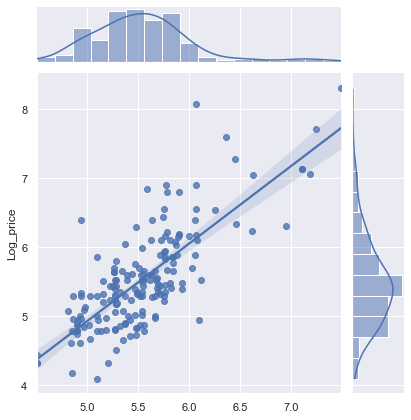

In [1449]:
#df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':pee})
#df

# Use the forest's predict method on the test data

# Calculate the absolute errors
errors = abs(pee -  y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')



mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

sns.jointplot(x=pee,y=y_test, kind='reg')




In [1758]:
MSE = np.square(np.subtract(y_test,pee)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
print(mean_absolute_error(y_test, pee))

Root Mean Square Error:

0.46105427089245204
0.34002970707972335


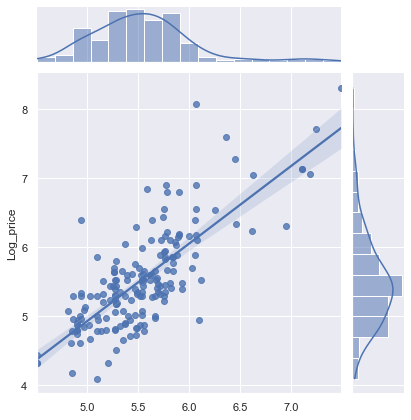

In [1477]:

sns.jointplot(x=pee,y=y_test, kind='reg')

In [1450]:
rfr_random.fit(X_train, y_train);
print(rfr_random.best_params_)
print(rfr_random.score(X_train , y_train))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 9, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True}
-0.35867744930651324


In [1451]:
rfr_random.fit(X_train, y_train);
print(rfr_random.best_params_)
print(rfr_random.score(X_test , y_test))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 9, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True}
-0.34002970707972335


In [1461]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import r2_score







In [1462]:
#print(r2_score(y_test, y_pred)*100)

In [1523]:
regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.3560005603748956

In [1524]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

In [1538]:
best_regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=best_n_estimators,
    learning_rate=1.0
)
best_regressor.fit(X_train, y_train)

#best_regressor.score(X_val, y_val) # y

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=2)

In [1539]:
y_pred = best_regressor.predict(X_test)
mean_absolute_error(y_test, y_pred)



0.41946300082449794

In [1540]:
best_regressor.score(X_test, y_test)  #

0.4123323851717493

Mean Absolute Error: 0.42 degrees.
Accuracy: 92.46 %.


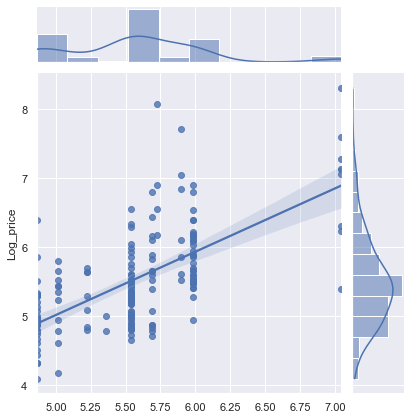

In [1541]:
errors = abs(y_pred -  y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')



mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

sns.jointplot(x=y_pred,y=y_test, kind='reg')

In [1495]:
 
fig = px.scatter(x=np.exp(y_pred), y=np.exp(y_test), opacity=0.65,title="Regression Fit",labels=dict(y='y (Saudi Riyal)', x='y Predicted (Saudi Riyal) '),
trendline="ols", trendline_scope="overall")
fig.show()
    
  
    

In [1542]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [1571]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.1974 degrees.
Accuracy = 96.51%.


In [1572]:
base_model = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20,scoring='neg_mean_absolute_error',
                                cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=False)

base_model.fit(X_train, y_train)
base1 = evaluate(base_model, X_test, y_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Model Performance
Average Error: 0.3400 degrees.
Accuracy = 93.90%.


In [1573]:
base_model = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)

base_model.fit(X_train, y_train)
base2 = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.4047 degrees.
Accuracy = 92.75%.


In [1574]:
base_model = LinearRegression() #poly

base_model.fit(X_train_poly, y_train)
base3 = evaluate(base_model, X_test_poly, y_test)

Model Performance
Average Error: 0.3694 degrees.
Accuracy = 93.40%.


In [1575]:
base_model = LinearRegression(fit_intercept=True) # regression

base_model.fit(X_train, y_train)
base4 = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.4705 degrees.
Accuracy = 91.61%.


In [1578]:
print('Improvement of {:0.2f}%.'.format( 100 * (base_accuracy - base4) / base4))

Improvement of 5.35%.


In [1490]:
#inp = np.array([2,158,8.1])  # beds , number of rating ,rating

In [1470]:
#ip = inp.reshape((1,-1))


In [1471]:
#zx= rfr_random.predict(inp)

In [1472]:
zx

array([67.86293587])

In [1473]:
X_test
y_test

536    6.040255
538    5.010635
852    5.087596
741    5.700444
537    5.886104
         ...   
358    5.648974
371    5.616771
318    5.416100
283    6.336826
805    5.752573
Name: Log_price, Length: 180, dtype: float64

ValueError: All arrays must be of the same length

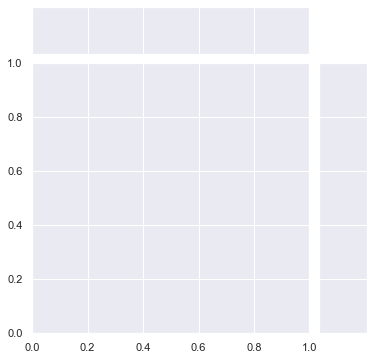

In [880]:
sns.jointplot(x=preds_lr,y=y_train, kind='reg')